# Desarrollo de pipeline semi-automático para estudiar los condicionamientos estructurales en la divergencia secuencial de proteínas

**Autor:** CE Guisande Donadio

## Bloque de Codigo 1.

### Objetivo
* Cargar liberias
* Definir funciones 

In [1]:
#Encabezado del archivo
import os,csv
import pandas as pd
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
%matplotlib inline

def cargar_txt_en_lista(file_path):
    return_list = []
    with open(file_path,"r") as openfile:
        for lines in openfile:
            return_list.append(lines.replace("\n",""))
            
    return return_list

#Filtros de String para dataframe
#Variante para una columna

def sfilter_by_col(df_query,col_name,text,has=True):
    df_return = df_query.loc[df_query[col_name].str.contains(text)==has]
    return df_return

def sfilter_linage(df_query,text,has=True):
    df_return = df_query.loc[df_query["Linage"].str.contains(text)==has]
    return df_return


def sfilter_org(df_query,text,has=True):
    df_return = df_query.loc[df_query["Organism"].str.contains(text)==has]
    return df_return

def sfilter_by_uniprot(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return df_return


def get_pdb_list_from_df(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return_list = filter_by_uniprot(df_proteins_celular,"P04637").iloc[0]["PDB_CHAIN_LIST"]
    return return_list

def printd(text):
    display(Markdown(text))
    return

def strlen(x):
    return str(len(x))

def check_not_None(thing):
    if type(thing) != type (None):
        return True
    else:
        return False
    
def endline ():
    line = "_ _ "*22
    printd("# "+line)
    return



printd("## Informe generado por el *Bloque de Codigo 1.*")
print ("Ya puede correr el siguiente bloque")
endline()

## Informe generado por el *Bloque de Codigo 1.*

Ya puede correr el siguiente bloque


# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo 2.

### Objetivos:
* Armar un dataframe **(df_work)** con ensembles que:
  * Uniprot SWISSPROT  
  * Tengan más de 5 cadenas en PDB
  * Más de 20 homologos en SWISSPROT

## Informe generado por el Bloque de codigo 2

**Fercha del informe**: 2019-11-01

**Reading swissprot**

Dataframe size: 560459

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs
0,Q0ATK2,ACCD_MARMM,reviewed,Acetyl-coenzyme A carboxylase carboxyl transfe...,accD Mmar10_0089,Maricaulis maris (strain MCS10),311,"cellular organisms, Bacteria, Proteobacteria, ...",MTEKSNGMSWLSKITPPGMSKIFSKRDTPDNLWVKCPVSEEMVFHK...,394221
1,O40976,1A_CMVNT,reviewed,Replication protein 1a [Includes: ATP-dependen...,ORF1a,Cucumber mosaic virus (strain NT9) (CMV),993,"Viruses, Riboviria, Bromoviridae, Cucumovirus,...",MATSSFNINELVASHGDKGLLATALVDKTAHEQLEEQLQHQRRGRK...,117124
2,Q84P24,4CLL6_ARATH,reviewed,4-coumarate--CoA ligase-like 6 (EC 6.2.1.-) (4...,4CLL6 At4g19010 F13C5.180,Arabidopsis thaliana (Mouse-ear cress),566,"cellular organisms, Eukaryota, Viridiplantae, ...",MAATHLHIPPNPKTQTSHQNPPFWFSSKTGIYTSKFPSLHLPVDPN...,3702
3,P62260,1433E_RAT,reviewed,14-3-3 protein epsilon (14-3-3E) (Mitochondria...,Ywhae,Rattus norvegicus (Rat),255,"cellular organisms, Eukaryota, Opisthokonta, M...",MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...,10116
4,P0CK20,A25_VACCC,reviewed,Protein A2.5,A2.5L,Vaccinia virus (strain Copenhagen) (VACV),76,"Viruses, Poxviridae, Chordopoxvirinae, Orthopo...",MSWYEKYNIVLNPPKRCSSACADNLTTILAEDGNHIRAILYSQPKK...,10249


**Reading PDBSWS**

swslist dataframe size: 47097

,UNIPROT_ID,PDB_CHAIN_LIST,pdb_chain_count
0,A0A010,"[5B00_A, 5B00_B, 5B00_C, 5B01_A, 5B01_B, 5B01_...",57
1,A0A011,"[3VK5_A, 3VK5_B, 3VKA_A, 3VKA_B, 3VKB_A, 3VKB_...",10
2,A0A585,[4MNQ_E],1
3,A0A5A3,"[4UDT_B, 4UDU_B]",2
4,A0A5B3,"[5NHT_B, 5NQK_B]",2


**Merge Sprot with SWS**

Dataframe size: 26550

,Length,Taxonomic lineage IDs,pdb_chain_count
count,26550.000000,2.655000e+04,26550.000000
mean,454.547081,1.216896e+05,10.030245
std,545.239279,1.946628e+05,30.223010
min,5.000000,1.700000e+01,1.000000
25%,188.000000,9.606000e+03,2.000000
50%,328.000000,1.009000e+04,4.000000
75%,529.000000,2.089640e+05,8.000000
max,34350.000000,2.510777e+06,1084.000000


### Resumen de informacion del conjunto de proteinas a estudiar

Viruses Dataframe size: 567

Celular Dataframe size: 10165

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bacteria dataframe size: 3694

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Archaea dataframe size: 418

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Eukaryota dataframe size: 6053

### Graficos del dataframe de trabajo( Organismos Celulares)

**Histograma de Length menores a 3000**

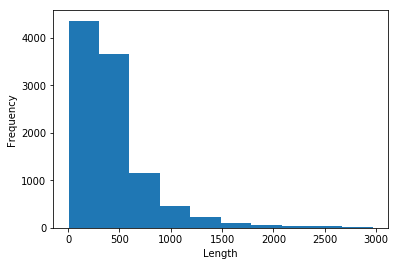

**Histograma de pdb_chain_count menores a 200**

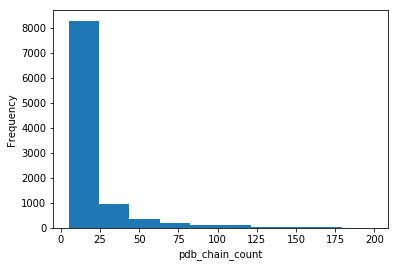

**Se guardo el archivo:** archivos_importantes/df_work_2019-11-01.tsv

Informe generado en 9.593984365463257

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

In [2]:
import time,datetime
# MAIN/CARGA DE DATOS
printd("## Informe generado por el Bloque de codigo 2")
printd("**Fercha del informe**: "+str(datetime.date.today()))
tiempo_inicial = time.time()

log_error = dict()
log_error["SWISPROT"] = list()
log_error["PDBSWS_PDBUNIPROT"] = list()

# paths de archivos iniciales
path_swissprot_tab =  "bases_de_datos_ref/uniprot-reviewed_20190730.tab"
path_pdbwsw_pdbchain = "bases_de_datos_ref/pdb_uniprot_chain_map.lst.2"


#CARGAR SWISSPROT
printd ("**Reading swissprot**")

df_sprot = pd.read_csv(path_swissprot_tab,sep="\t")
df_sprot.columns = ['UNIPROT_ID', 
                    'Entry_name', 
                    'Status', 
                    'Protein_names', 
                    'Gene names', 
                    'Organism', 
                    'Length', 'Linage', 
                    'Sequence', 
                    'Taxonomic lineage IDs']
printd("Dataframe size: "+strlen(df_sprot))
display(df_sprot.head(n=5))


#ESTE BLOQUE SIRVE PARA CARGAR SIFTS, 
#actualmente no esta en uso
#
"""
printd ("## Reading sitfs")
df_sifts = pd.read_csv("bases_de_datos_ref/sifts_uniprot_pdb.tsv",header=1,sep="\t")
df_sifts.columns = ["UNIPROT_ID","PDB_list_sifts"]
printd("Dataframe size: "+strlen(df_sifts))
display(df_sifts.head(n=5))

printd ("Merge sprot with sifts")
df_sprot_pdb = pd.merge(df_sprot,df_sifts,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.head(n=1))
"""

###CARGAR PDBSWS
printd ("**Reading PDBSWS**")
#Esto carga la lista manualmente por que algunos codigos uniprot no figuran.
#son listas de ancho fijo (ej: '101m A P02185')
#algunas lineas del archivo 
lst_pdbsws = []
tmp_pdbsws = cargar_txt_en_lista(path_pdbwsw_pdbchain)
for index,line in enumerate(tmp_pdbsws):
    if (line[-1] != "?") and (line[-1] != " "):
        pdb_chain_id = line[0:4].upper()+"_"+line[5] 
        tmp = [pdb_chain_id,line[0:4],line[5],line[7:]]
        lst_pdbsws.append(tmp)
    else:
        #Los errores de carga de archivos se anexan a su log
        message = "Error in line "+ str(index) + ": "+ (line) 
        log_error["PDBSWS_PDBUNIPROT"].append(message)
#Borrar vbariables
del pdb_chain_id
del tmp_pdbsws
del tmp
#Crea el dataframe usando la lista
df_pdbsws = pd.DataFrame(lst_pdbsws).dropna()
df_pdbsws.columns = ["PDB_CHAIN_ID","PDB","CHAIN","UNIPROT_ID"]
#Los agrupa por pdb
df_swslist = df_pdbsws.groupby(["UNIPROT_ID"],as_index=False).agg({'PDB_CHAIN_ID':lambda x:list(x)})
#Agrega el numero de pdbs en la lista
df_swslist["pdb_chain_count"] = df_swslist.apply({"PDB_CHAIN_ID":lambda x: len(x)})
df_swslist.columns= ["UNIPROT_ID","PDB_CHAIN_LIST" ,"pdb_chain_count"]
#Informe visible
printd ("swslist dataframe size: "+strlen(df_swslist))
display(df_swslist.head())

### MERGE: AGREGA las columnas de sws a sprot, elimina los uniprot que no tengan mapeo.
printd ("**Merge Sprot with SWS**")
df_sprot_pdb = pd.merge(df_sprot,df_swslist,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.describe())

### FILTRANDO
# De las proteinas con mas de 5 cadenas, 
# Separar los virus en una tabla aparte.
df_work = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses")==False)]
df_virus = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses"))]
printd ("### Resumen de informacion del conjunto de proteinas a estudiar")
printd ("Viruses Dataframe size: "+strlen(df_virus) )
printd ("Celular Dataframe size: "+strlen(df_work))
for taxa in ["Bacteria","Archaea","Eukaryota"]:
    printd ("&nbsp;"*6+taxa+" dataframe size: "+strlen (sfilter_linage(df_work,taxa)))

printd("### Graficos del dataframe de trabajo( Organismos Celulares)")

printd("**Histograma de Length menores a 3000**")
plot_his1 = df_work["Length"].loc[df_work["Length"]<3000].plot(kind="hist")
plot_his1.set_xlabel("Length")
plt.show()


printd("**Histograma de pdb_chain_count menores a 200**")
plot_his2 = df_work["pdb_chain_count"].loc[df_work["pdb_chain_count"]<200].plot(kind="hist")
plot_his2.set_xlabel("pdb_chain_count")
plt.show()




#Esta linea guarda el df_work en un archivo tsv
df_work_path = ("archivos_importantes/df_work_"+str(datetime.date.today())+".tsv")
df_work.to_csv(df_work_path,sep="\t")
printd ("**Se guardo el archivo:** "+ df_work_path)
printd( "Informe generado en "+str(time.time()-tiempo_inicial))
printd ("Ya puede correr el siguiente bloque.")
endline()

## Bloque de Codigo 3


### Objetivos:
* Definir funciones para:
  * correr blast sobre swiwssprot
  * correr cd-hit a 0.95
  * parsear esos resultados y cargarlos en la  *variable global* **ensemeble_data**
 

In [123]:
#Crea un diciconario para acumular los datos a usar
#crea un diccionario que contiene dataframes especificos utiles
#las llaves son los uniprot_id.

def sort_cdhitcluster(list_query):
    return sorted(list_query,key = lambda x: x[2],reverse=True)

def dibujar_histograma(df_query,col):
    plot_his1 = df_query[col].plot(kind="hist")
    plot_his1.set_xlabel(col)
    plt.show()
    return

def show_ensemble_info(query):
    printd("### Mostrando datos de la proteina de estudio")
    for entry in ensemble_data[query]:
        if "sorted" in entry:
            histo = [len(ensemble_data[query][entry][x]) for x in range(30,91,10)]
            printd ("&nbsp;&nbsp;**"+entry+"** >"+ "`"+str(histo)+"`")
        else:
            printd ("&nbsp;&nbsp;**"+entry+"** >"+ "`"+str(ensemble_data[query][entry])+"`")
    return

def run_blast(fasta_file):
    output_filename = fasta_file.replace("fasta/","blast_results/").replace(".fasta","_blast_results.txt")
    cmd = "blastp -query "+ fasta_file +" -db uniprot_sprot.db -evalue 1e-10 -out "+ output_filename +" -outfmt '6 qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcovs' -num_alignments 1000"
    os.system(cmd)
    return output_filename


#el imput es el fasta con los homologos, el coef tiene que ser un string.
def cdhit_stuff(filename_hsf,coef):
    outfile_cdhit =  filename_hsf.replace("fasta/homologs_sprot/","cd-hit-results-"+coef+"/").replace("_homologs_sprot.fasta","_cd-hit")
    
    #si el archivo no existe, corre el cdhit
    if not os.path.isfile(outfile_cdhit):
        cmd = "cd-hit -i " + filename_hsf + " -o " + outfile_cdhit + " -c "+coef
        os.system(cmd)
        
    outfile_cdhit = outfile_cdhit+".clstr"
    #parsea los resultados del cdhit
    clusters = dict()    
    if os.path.isfile(outfile_cdhit):
        with open(outfile_cdhit,"r") as openfile:
            for line in openfile:
                text = line.replace("\n","")
                if text[0] == ">":
                    clus_num = (text[1:])
                    clusters[clus_num] = list()
                if text[0] in [str(x) for x in range(0,10)]:
                    uniprot_id =  (text.split(">")[1][0:6])
                    rep = int ("*" in text.split(">")[1])
                    if rep == False:
                        at_percent = float(text.split("at ")[1].replace("%",""))
                    else:
                        at_percent = float("100.00")
                    clusters[clus_num].append( [uniprot_id,bool(rep),at_percent])
        for cluster_n in clusters:
            clusters[cluster_n] = sort_cdhitcluster(clusters[cluster_n])
        return outfile_cdhit,clusters
    else:
        return "N/A","N/A"

def make_fasta_from_list(query,query_list,outfilename):
    with open(outfilename,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for uniprot_id in query_list:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id]["Sequence"].iloc[0]
                    openfile.write(">"+uniprot_id)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
    return outfilename


def get_cdhit_rep(uniprot_query,coef="0.95"):
    cluster_rep_list = []
    for cluster in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"]:
        for members in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"][cluster]:
            if members[1] == True:
                uniprot_id = members[0]
                df1 = ensemble_df[uniprot_query]["blast_results"]
                if len(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"] ) != 0:
                    ident_val = max(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"])
                    cluster_rep_list.append((members[0],ident_val))
                else:
                    ident_val = 0
                    cluster_rep_list.append((members[0],ident_val))
    return cluster_rep_list    

def histo_dic_cdhit(uniprot_id,coef="0.95"):
    bins =  [30,40,50,60,70,80,90]
    histo_dict = dict()
    for n in bins:
        histo_dict[n] = list()

    for id_and_ident in sorted (get_cdhit_rep(uniprot_id,coef),key = lambda x: x[1]):
        for n in bins:
            if (id_and_ident[1] >= n) and (id_and_ident[1]) < n+10:
                histo_dict[n].append(id_and_ident)
                break
    return histo_dict


ensemble_data = dict()
ensemble_df = dict()
#esta es la funcion importante
def estudiar_proteina(query,show=True,force=False):
    #Check que el query sea correcto
    if not query in list(df_work["UNIPROT_ID"]):
        print ("La proteina solicitada no se encuentra en df_work.")
        return False
    
    #premite la escritura en las variables globales
    global ensemble_data
    global ensemble_df
    
    if check_not_None(ensemble_data.get(uniprot_id)):
        if force==False:
            if show:
                show_ensemble_info(query)
            return True
            
    #carga informacion en ensemble_data y ensemble_df
    ensemble_df[query] = dict()
    ensemble_data[query] = dict(sfilter_by_uniprot(df_work,query).iloc[0])
    #da una lista 
    ensemble_data[query]["PDB_in_df_work"] = (list(set([x[0:4] for x in ensemble_data[query]["PDB_CHAIN_LIST"]])))

    #create fasta file with query seq
    with open ("fasta/"+query+".fasta","w") as openfile:
        openfile.write (">"+query+"\n")
        openfile.write (ensemble_data[query]["Sequence"]+"\n")
    
    #BUSCAR RESULTADOS DEL BLAST, SI NO EXISTEN, CORRERLO
    blast_results_filename = "blast_results/"+query+"_blast_results.txt"
    if os.path.isfile(blast_results_filename):
        if os.path.getsize(blast_results_filename) == 0:
            if show: print ("R ",end="")
            os.system("rm "+blast_results_filename)
            ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
        else:
            ensemble_data[query]["blast_results"] = blast_results_filename
    else:
        ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
    
    
    #PARSEAR LOS RESULTADOS EL BLAST y cargarlos a ensemble data
    if os.path.getsize(ensemble_data[query]["blast_results"]) > 0:
        #leer los datos importantes del blast y colocarlos en un dataframe
        df1 = pd.read_csv(ensemble_data[query]["blast_results"],header=None,sep="\t")
        df1.columns = "qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcov".split(" ")
        df1["UNIPROT_ID"] =  df1["sseqid"].str.split("|",expand=True)[1]
        #se agregan los valores de qstart y qend
        df2 = df1[["UNIPROT_ID","pident","qcov","qstart","qend","sstart","send","gaps"]].loc[(df1["UNIPROT_ID"]!=query) & (df1["pident"]>30) & (df1["qcov"]>75) ]
        
        #esta linea elimina los resultados repetidos en el blast y se queda solo con el primer hit.
        ensemble_df[query]["blast_results"] = df2.drop_duplicates(["UNIPROT_ID"])
        del df1,df2
        #carga la infomacion de los homologos al ensemble_data
        ensemble_data[query]["homologs_sprot"] = list(set(list(ensemble_df[query]["blast_results"]["UNIPROT_ID"])))
        ensemble_data[query]["homologs_in_df_work"] = list(set(df_work["UNIPROT_ID"]) & set(ensemble_data[query]["homologs_sprot"]))
    else:
        ensemble_data[query]["homologs_sprot"] = []
        if show: printd("## Alerta, blast_results still 0 "+query)    

        return False
    
    ####### SI tiene menos de 20 homologos NO SIGUE.
    if len( ensemble_data[query]["homologs_sprot"])< 20:
        return False
    
    #CREAR FASTA DE HOMOLOGOS
    filename_hsf = "fasta/homologs_sprot/"+query+"_homologs_sprot.fasta"
    if os.path.isfile(filename_hsf):
        ensemble_data[query]["homologos_sprot_fasta"] = filename_hsf
    else:
        with open(filename_hsf,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for homolog in ensemble_data[query]["homologs_sprot"]:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog]["Sequence"].iloc[0]
                    openfile.write(">"+homolog)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
            ensemble_data[uniprot_id]["homologos_sprot_fasta"] = filename_hsf
    
    #corre el cdhit si el archivo de salida no existe. 
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.95")
    ensemble_data[query]["cd-hit-results-0.95"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.95_parsed"] = cdhit_parsed
    ensemble_data[query]["cd-hit-sorted-0.95"] = histo_dic_cdhit(query,"0.95")
    
    #Estas lineas hacian el codigo extremadamente lento de decide hacerlo on-demand
    #ensemble_data[query]["cd-hit-results-0.95_fasta"] = make_fasta_from_list(query,[x[0] for x in get_cdhit_rep(query,"0.95")],"fasta/cdhit-0.95/"+query+"_cdhit-0.95.fasta")
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.80")
    ensemble_data[query]["cd-hit-results-0.80"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.80_parsed"] = cdhit_parsed
    ensemble_data[query]["cd-hit-sorted-0.80"] = histo_dic_cdhit(query,"0.80")
    
    
    #ensemble_data[query]["cd-hit-results-0.80_fasta"] = make_fasta_from_list(query,[x[0] for x in get_cdhit_rep(query,"0.80")],"fasta/cdhit-0.80/"+query+"_cdhit-0.80.fasta")
    
    #muestra los resutaldos hasta el momento
    if show:
        show_ensemble_info(query)
    return True

printd ("## Informe generado por el Bloque de codigo 3")
print (" ")
#Checkquer estructura de carpetas
folder_list = ["ent_files",
               "fasta",
               "blast",
               "pdb_chains",
               "cd-hit-results-0.95",
               "cd-hit-results-0.80",
               "tree"]

printd ("Verificando la estructura de carpetas.")
for folder in folder_list:
    if not os.path.isdir(folder):
        print ("* Creating folder "+ folder)
        os.mkdir(folder)
printd("Ya puede correr el siguiente bloque.")
endline()

## Informe generado por el Bloque de codigo 3

Verificando la estructura de carpetas.

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo 4

### Objetivos:
* Correr **estudiar_proteina(`uniprot_id`)** sobre df_work
* guardar en `list_under_20` aquellas proteinas que no tienen más de 20 homologos sprot.
* Guardar `ensemble_data` en un archivo csv

In [124]:
# Esta ejecuta la funcion estudiar_protina sobre la lista del df_work
# Solo son aceptadas aquellas que tengan <20 homologos sprot

#Solo funciona si es la unica funcio que imprime a lo largo de todo el loop sobre i
def print_progreso(i,total):
    percent = int(index/how_many*10000)/100
    print ("Completed:",index,"of",how_many,"| " + str(percent) +"%  ",end="\r")
    return

printd ("### Informe generado por Bloque de Codigo 4")

ed_filename = "archivos_importantes/ensemble_data_201911011659.csv"

#Si existe la version declarada arriba, lee los datos de ahi"
if os.path.isfile(ed_filename):
    printd ("El archivo existe")
    printd ("Cargando: `"+ed_filename+"`")
    df_reload = pd.read_csv(ed_filename)

    printd ("Ensemble data tiene: "+str(len(df_reload))+" lineas.")
    display(df_reload.head(n=2))

    #mete el df_relad en ensemble_data
    for index,uniprot_id  in enumerate(df_reload["UNIPROT_ID"]):
        print (index+1,"of",4060,end="\r")
        ensemble_data[uniprot_id] = dict()
        literal_list = ["PDB_CHAIN_LIST",  
               "PDB_in_df_work",
               "homologs_sprot",
               "homologs_in_df_work",
               "cd-hit-results-0.95_parsed",
               "cd-hit-sorted-0.95",
               "cd-hit-results-0.80_parsed",
               "cd-hit-sorted-0.80"]
        
        for labels in df_reload:
            if labels in literal_list:
                x = ast.literal_eval((df_reload.loc[(df_reload["UNIPROT_ID"]==uniprot_id)][labels].iat[0]))
            else:
                x = df_reload.loc[(df_reload["UNIPROT_ID"]==uniprot_id)][labels].iat[0]
            ensemble_data[uniprot_id][labels] = x
    
    #recalcula la list_under_20 
    list_under_20 = []
    for uniprot_id in list(df_work["UNIPROT_ID"]):
        if not uniprot_id in list(df_reload["UNIPROT_ID"]):
            list_under_20.append(uniprot_id)
    printd ("list_under_20: "+strlen(list_under_20)+" lineas.")
else:
    list_of_under_20  = []
    how_many = len(list(df_work["UNIPROT_ID"]))
    for index,uniprot_id in enumerate(list(df_work["UNIPROT_ID"])):
        run_ok =estudiar_proteina(uniprot_id,False)

        #Indicador de progreso
        if index % 25 == 0:
            print_progreso(index,how_many)
        if run_ok == False:
            list_of_under_20.append(uniprot_id)
            del ensemble_data[uniprot_id]
            #print (uniprot_id + " have been removed under 20 homolog rule")
        else:
            pass
            #print (uniprot_id + " acepted in ensemble_data")

    print ("Completed : 100%.")
    printd ("**Removed under 20 homolog rule:** ")
    printd ("`"+str(list_of_under_20[0:10])+"...`")
    printd ("**list_of_under_20:** ")
    printd ("`"+str(len(list_of_under_20))+"`")

    printd ("**Acepted in enseble data** `"+ str(list(ensemble_data)[0:10])+ "...`")
    printd ("**ensemble_data:** `"+str(len(list(ensemble_data)))+"`")

    timestamp = str(datetime.datetime.now()).replace("-","").replace(":","").replace(" ","")[0:12]
    ed_filename = "archivos_importantes/ensemble_data_" + timestamp +".csv"

    printd ("Guardando  "+ed_filename)
    df_new = pd.DataFrame.from_dict(ensemble_data,orient="index")
    df_new.head()
    df_new.to_csv(ed_filename,header=True,index=False)
    del df_new

printd("Ya puede correr el siguiente bloque.")
endline()


### Informe generado por Bloque de Codigo 4

El archivo existe

Cargando: `archivos_importantes/ensemble_data_201911011659.csv`

Ensemble data tiene: 4640 lineas.

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,...,blast_results,homologs_sprot,homologs_in_df_work,homologos_sprot_fasta,cd-hit-results-0.95,cd-hit-results-0.95_parsed,cd-hit-sorted-0.95,cd-hit-results-0.80,cd-hit-results-0.80_parsed,cd-hit-sorted-0.80
0,A0QSL8,RPOA_MYCS2,reviewed,DNA-directed RNA polymerase subunit alpha (RNA...,rpoA MSMEG_1524 MSMEI_1488,Mycobacterium smegmatis (strain ATCC 700084 / ...,350,"cellular organisms, Bacteria, Terrabacteria gr...",MLISQRPTLSEETVAENRSRFVIEPLEPGFGYTLGNSLRRTLLSSI...,246196,...,blast_results/A0QSL8_blast_results.txt,"['Q8CX32', 'Q8A4A2', 'B5ZZ57', 'P92429', 'Q81V...","['P0A7Z4', 'Q9Z9H6', 'P9WGZ1', 'P0A7Z6', 'A7ZS...",fasta/homologs_sprot/A0QSL8_homologs_sprot.fasta,cd-hit-results-0.95/A0QSL8_cd-hit.clstr,"{'Cluster 0': [['P60315', True, 100.0]], 'Clus...","{30: [('Q7YJU6', 30.068), ('Q0ZIY7', 30.068), ...",cd-hit-results-0.80/A0QSL8_cd-hit.clstr,"{'Cluster 0': [['P60315', True, 100.0]], 'Clus...","{30: [('A6H5L3', 30.435), ('Q14FC5', 30.508000..."
1,A0R066,ILVE_MYCS2,reviewed,Branched-chain-amino-acid aminotransferase (BC...,ilvE MSMEG_4276 MSMEI_4176,Mycobacterium smegmatis (strain ATCC 700084 / ...,368,"cellular organisms, Bacteria, Terrabacteria gr...",MNSGPLEFTVSANTNPATDAVRESILANPGFGKYYTDHMVSIDYTV...,246196,...,blast_results/A0R066_blast_results.txt,"['O32954', 'P54690', 'A9UZ24', 'K7QKH1', 'P242...","['P0AB80', 'O15382', 'P54687']",fasta/homologs_sprot/A0R066_homologs_sprot.fasta,cd-hit-results-0.95/A0R066_cd-hit.clstr,"{'Cluster 0': [['O14370', True, 100.0]], 'Clus...","{30: [('K0E3V3', 31.288), ('Q58414', 31.399), ...",cd-hit-results-0.80/A0R066_cd-hit.clstr,"{'Cluster 0': [['O14370', True, 100.0]], 'Clus...","{30: [('K0E3V3', 31.288), ('Q58414', 31.399), ..."


list_under_20: 5525 lineas.

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codidgo 5

### Objetivos
* Hacer un resumen de los datos ya calculados.

In [125]:
import math

#Get the total size of a folder.
def get_size(start_path = '.'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
    return total_size

#convierte un valor entero en bytes a human 
def bytes2human(size):
    unit = ["","k","M","G","T","P","E","Z"]
    if size > 0:
        order = int(math.log(size,1024))
        if order > (len(unit)-1):
            order = (len(unit)-1)
        size_h = str(int(size/(1024**order)))+"\t"+unit[order]+"b"
    else:
        size_h = "0\t b"
    return size_h


folder_list = ["archivos_importantes",
               "bases_de_datos_ref",
               "fasta",
               "blast_results",
               "cd-hit-results-0.95",
               "cd-hit-results-0.80",
               "tree",
               "ent_files",
               "pdb_chains"]
printd ("## Informe generado por bloque de Codigo 5")
print ("Timestamp: ",str(datetime.datetime.now()))
print ("")

for folder in folder_list:
    if os.path.isdir(folder):
        size =  bytes2human(get_size(folder))
        print (size,folder,sep="\t")
    else:
        print (folder +" is not a folder")    

print ("")

               


endline()

## Informe generado por bloque de Codigo 5

Timestamp:  2019-11-01 21:39:42.731000

496	Mb	archivos_importantes
663	Mb	bases_de_datos_ref
353	Mb	fasta
209	Mb	blast_results
225	Mb	cd-hit-results-0.95
165	Mb	cd-hit-results-0.80
186	Mb	tree
206	Mb	ent_files
187	Mb	pdb_chains



# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo E1

### Objetivos
* define la fucuncion `seleccionar_para_alinear`
* la aplica sobre los resultados de `ensemble_data[uniprot_id]["cd-hit-sorted-0.95"]` si:
  * antes de seleccionar tiene más de 80 homologos en total
  * la cantidad de bins vacios es menor a 3
  * despues de agregar los homologos de df_work, tiene al menos 70 homologos
* Guarda los resultados en `caped25`

## Informe generado por Bloque de Codigo E1

`caped25_notA_notB` 2996

`caped25_condA_notB `504

`caped25_condA_condB` 1140

,uniprot_id,pdb_chains,len_ali,histogram
0,A0QSL8,8,97,"[25, 25, 17, 2, 13, 6, 2]"
1,A0R3D3,5,76,"[25, 25, 11, 4, 4, 4, 0]"
2,A3M692,124,82,"[0, 25, 25, 25, 0, 1, 0]"
3,A5U4M0,18,74,"[25, 25, 14, 1, 4, 3, 0]"
4,A5U8S7,5,87,"[25, 25, 25, 3, 2, 3, 0]"


**Histograma de pdb_chains <200**

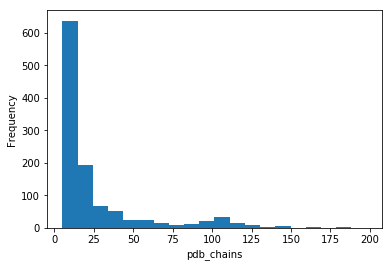

**Histograma de pdb_chains >200**

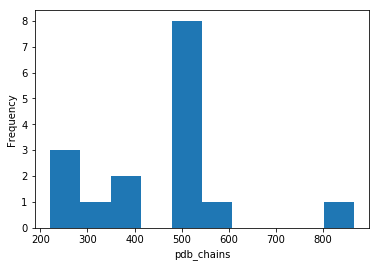

**Histograma de len_ali**

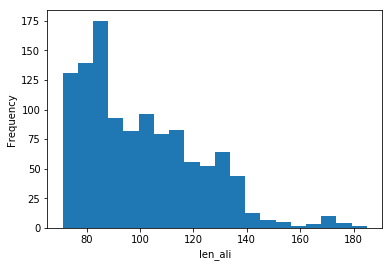

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

In [126]:
#histodict_tuple: diccionario de cohortes, con lista de tuplas ordenadas by [1] (Uniprot_id,%ident)
#homologos_dfwork: una lista con los 
def seleccionar_para_alinear(histodic_tuple,homologos_dfwork,cutoff=25):
    para_alinear = dict()
    for x in range(30,91,10):
        cantidad = len(histodic_tuple[x])
        #basicamente, como cada cohorte esta ordenada por porcentaje de identidad
        # cuando hay muchos trata de cubrir todo el intervalo
        # saltando de a "k" en la iteracion.
        if cantidad > cutoff:
            seleccionados_i = []
            k = cantidad//cutoff 
            if k==0:
                k=1 #el minimo es i
            for i in range(0,cantidad,k):
                seleccionados_i.append (histodic_tuple[x][i][0])

                #para no pasarse, corta si se supera el cutoff
                if len(seleccionados_i) >= cutoff:
                    break
        else:
            #si son menos, los mandamos todos por las dudas
            seleccionados_i =  [x[0] for x in histodic_tuple[x]]

        para_alinear[x] = seleccionados_i

    histo_selec = [len(para_alinear[x]) for x in range (30,91,10)]

    #aca hay que agregar, si no estan los homologos que estan en df_work
    # si bien algunos sean descartados por los filtros, es necesario que esten
    # en los alineamientos para compararlos

    seleccionados_full = []
    for x in range (30,91,10):
        for homolgos in para_alinear[x]:
            seleccionados_full.append(homolgos)
    for ids in homologos_dfwork:
        if not ids in seleccionados_full:
            seleccionados_full.append(ids)
    
    return seleccionados_full,histo_selec


#### FIN DEL AREA DE DEFINICON DE FUNCIONES

printd("## Informe generado por Bloque de Codigo E1")


df1 = pd.DataFrame()

#para ser incluidos, deben tener + de 80 al final
count = 0
caped25_notA = []
caped25_condA_condB = []
caped25_condA_notB = []
to_dataframe = []
for uniprot_id in list(ensemble_data):
    #arma un historgrama de los cluster de ch-hit
    histo = [len(ensemble_data[uniprot_id]["cd-hit-sorted-0.95"][x]) for x in range(30,91,10)]

    #condicion A
    if (sum (histo) > 80 ) and (histo.count(0)<=3):
        cdhit95_histodic = ensemble_data[uniprot_id]["cd-hit-sorted-0.95"]
        homologos_dfwork = ensemble_data[uniprot_id]["homologs_in_df_work"]
        pdb_chains = str(ensemble_data[uniprot_id]["pdb_chain_count"])
        
        
        
        #Aca se usa la funcion para seleccionar las secuencias que van al alineamiento
        seleccionados_full,histo_selec =  seleccionar_para_alinear(cdhit95_histodic,homologos_dfwork,25)
        #condicion_B
        if len(seleccionados_full) > 70:
            # print (uniprot_id,"cdhit",histo,sum(histo),"-","-","-",sep="\t")
            to_dataframe.append ([uniprot_id,int(pdb_chains),len(seleccionados_full),histo_selec]) 
            ensemble_data[uniprot_id]["seleccionados_full"]= seleccionados_full
            count +=1
            caped25_condA_condB.append(uniprot_id)
        else:
            caped25_condA_notB.append(uniprot_id)
    else:
        caped25_notA.append(uniprot_id)

printd ("`caped25_notA_notB` "+strlen(caped25_notA))
printd ("`caped25_condA_notB `"+strlen(caped25_condA_notB))
printd ("`caped25_condA_condB` "+strlen(caped25_condA_condB))
df1 = pd.DataFrame(to_dataframe,columns=["uniprot_id","pdb_chains","len_ali","histogram"])
display(df1.head())

printd("**Histograma de pdb_chains <200**")
plot_his3 = df1["pdb_chains"].loc[df1["pdb_chains"]<200].plot(kind="hist",bins=20)
plot_his3.set_xlabel("pdb_chains")
plt.show()


printd("**Histograma de pdb_chains >200**")
plot_his4 = df1["pdb_chains"].loc[df1["pdb_chains"]>200].plot(kind="hist",bins=10)
plot_his4.set_xlabel("pdb_chains")
plt.show()


printd("**Histograma de len_ali**")
plot_his5 = df1["len_ali"].plot(kind="hist",bins=20)
plot_his5.set_xlabel("len_ali")
plt.show()


printd("Ya puede correr el siguiente bloque.")
endline()

## Bloque de Codigo E2

### Objetivo
* Sobre la lista `caped25_condA_condB`
  * Alinear 
  * Convertir a phy
  * Hacer arbol

In [127]:
# para hacer el archivo fasta 
def make_fasta_from_list(query,query_list,outfilepath):
    #Chequer que el representante este antes de agregarlo
    if not query in query_list:
        query_list = [query]+list(set(query_list))
    with open(outfilepath,"w") as openfile:
        for uniprot_id in query_list:
            #Si la secuencia esta en el dataframe de sprot
            if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id])>0:
                seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id]["Sequence"].iloc[0]
                openfile.write(">"+uniprot_id)
                openfile.write("\n")
                openfile.write(seq)
                openfile.write("\n")
def fasta2phy(inputfilename,outputfilename=""):
    if outputfilename == "":
        outputfilename=inputfilename.replace(".fasta","phy")
    clustal_cmd = 'clustalw "'+inputfilename+'" -convert -output=PHYLIP -outfile="'+outputfilename+'"'
    os.system(clustal_cmd)
    return


#ingresa fasta, sale philp
def alig_fasta(inputfilename,outputfilename=""):
    if outputfilename == "":
        outputfilename=inputfilename.replace(".fasta","phy")
    clustal_cmd = 'clustalw "'+inputfilename+'" -align -convert -output=PHYLIP -outfile="'+outputfilename+'"'
    #print (clustal_cmd)
    os.system(clustal_cmd)
    return

def hacer_arbol(uniprot_id,phy_file,code=""):
    os.chdir(path+"/tree")
    os.system( 'echo "XXXXX\nY" > config'.replace("XXXXX","../"+phy_file) )
    os.system( 'phylip protdist < config') 
    os.system( 'mv outfile XXXXX_protdist_WWWWW'.replace("XXXXX",uniprot_id).replace("WWWWW",code) )
    os.system( 'echo "XXXXX_protdist_WWWWW\nJ\n99\nY" >config'.replace("XXXXX",uniprot_id).replace("WWWWW",code) ) 
    os.system( 'phylip neighbor <config')
    os.system("rm config")
    os.system("mv outfile "+uniprot_id+"_"+code+".outfile")
    os.system("mv outtree "+uniprot_id+"_"+code+".tree")
    os.chdir(path)
    return

printd ("## Informe del bloque de codigo E2")
path = "/home/emanuel/Documents/trabajo_actual/MegaScript/"
caped25 = caped25_condA_condB
for index,uniprot_id in enumerate(caped25):
    fasta_file = "fasta/caped25/"+uniprot_id+"_caped25.fasta"
    ali_phy = "alignments/"+uniprot_id+"_caped25.phy"
    out_tree = uniprot_id+"_caped25.tree"
    
    print (uniprot_id,index,"of",len(caped25),"1) FASTA",end="\r")
    
    if not os.path.isfile(fasta_file):
        make_fasta_from_list(uniprot_id, 
                         ensemble_data[uniprot_id]["seleccionados_full"],
                         path+fasta_file)
    
    
    print (uniprot_id,index,"of",len(caped25),"2) ALING",end="\r")
    if not os.path.isfile(ali_phy):
        alig_fasta(fasta_file,ali_phy)
        
    
    print (uniprot_id,index,"of",len(caped25),"3) TREE ",end="\r")
    if not os.path.isfile("tree/"+out_tree):
        hacer_arbol(uniprot_id,ali_phy,"caped25")
                          
    ensemble_data[uniprot_id]["caped25"] = [fasta_file,ali_phy,"tree/"+out_tree]
    
printd ("Ya puede correr el proximo bloque de codigo")
endline()

## Informe del bloque de codigo E2

Ya puede correr el proximo bloque de codigo

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo E3

### Objetivo
* Define la funcion choper que permite recortar un alineamiento fasta segun 

In [128]:
from Bio import SeqIO
#hay que darle un fasta alineado, y el nombre de la referencia en el fasta.
#la secuencia de referencia quedara arriba de todo
def choper(ali_filepath, ref,outfile,formato="fasta"):
    ali_homolog = {}
    for record in SeqIO.parse(ali_filepath,formato):
        ali_homolog[record.id] = list(record.seq) #se guarda como lista para poder borrar elementos
    ref_seq = ali_homolog[ref]
    
    #Genera una lista donde se guardan los index que deberian ser borrados
    index_for_removal = []
    for index,aa in enumerate(ref_seq):
        if aa == "-":
            index_for_removal.append(index)
    
    # Como la lista esta en orden creciente, se invierte para ir borrando de atras para adelante
    # y no cambiar el largo de las listas durante la iteracion
    index_for_removal.sort(reverse=True)

    for i in index_for_removal:
        for ids in ali_homolog:
            del ali_homolog[ids][i]
       
    #Esto es para asegurarse que la referencia quede arriba de todo
    ali_choped = {}
    ali_choped[ref] = ali_homolog[ref]
    del ali_homolog[ref]
    ali_choped.update(ali_homolog)
    
    #Esto guarda el archivo con las secuencias chopeadas
    with open(outfile,"w") as savefile:
        for ids in ali_choped:
            seq = ""
            for aa in ali_choped[ids]:
                seq += aa
                ali_choped[ids]=seq
            savefile.write(">"+ids+"\n"+ali_choped[ids]+"\n")
    return ali_choped

printd("## Informe generado por el bloque de codigo E3")

for index,uniprot_id in enumerate(caped25):
    ali_phy = ensemble_data[uniprot_id]["caped25"][1]
    outfile =  "choped/"+uniprot_id+"_ali-caped25-choped.fasta"
    print (index,"of",len(caped25),"   ",end="\r")
    if not os.path.isfile(outfile):
        choper(ali_phy,uniprot_id,outfile,"phylip")
    if not outfile in ensemble_data[uniprot_id]["caped25"]:
        ensemble_data[uniprot_id]["caped25"].append(outfile)
        
printd("Hemos terminiado por hoy")
endline()

## Informe generado por el bloque de codigo E3

Hemos terminiado por hoy

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

In [131]:
show_ensemble_info("A0R3D3")

### Mostrando datos de la proteina de estudio

&nbsp;&nbsp;**UNIPROT_ID** >`A0R3D3`

&nbsp;&nbsp;**Entry_name** >`PTH_MYCS2`

&nbsp;&nbsp;**Status** >`reviewed`

&nbsp;&nbsp;**Protein_names** >`Peptidyl-tRNA hydrolase (PTH) (EC 3.1.1.29)`

&nbsp;&nbsp;**Gene names** >`pth MSMEG_5432 MSMEI_5283`

&nbsp;&nbsp;**Organism** >`Mycobacterium smegmatis (strain ATCC 700084 / mc(2)155)`

&nbsp;&nbsp;**Length** >`191`

&nbsp;&nbsp;**Linage** >`cellular organisms, Bacteria, Terrabacteria group, Actinobacteria, Actinobacteria (high G+C Gram-positive bacteria), Corynebacteriales, Mycobacteriaceae, Mycolicibacterium, Mycobacterium smegmatis, Mycobacterium smegmatis (strain ATCC 700084 / mc(2)155)`

&nbsp;&nbsp;**Sequence** >`MAEPLLVVGLGNPGPTYAKTRHNLGFMVADVLAGRIGSAFKVHKKSGAEVVTGRLAGTSVVLAKPRCYMNESGRQVGPLAKFYSVPPQQIVVIHDELDIDFGRIRLKLGGGEGGHNGLRSVASALGTKNFHRVRIGVGRPPGRKDPAAFVLENFTAAERAEVPTIVEQAADATELLIAQGLEPAQNTVHAW`

&nbsp;&nbsp;**Taxonomic lineage IDs** >`246196`

&nbsp;&nbsp;**PDB_CHAIN_LIST** >`['2LGJ_A', '2NAF_A', '3KJZ_A', '3KK0_A', '3P2J_A']`

&nbsp;&nbsp;**pdb_chain_count** >`5`

&nbsp;&nbsp;**PDB_in_df_work** >`['2LGJ', '3KJZ', '3P2J', '2NAF', '3KK0']`

&nbsp;&nbsp;**blast_results** >`blast_results/A0R3D3_blast_results.txt`

&nbsp;&nbsp;**homologs_sprot** >`['A7NBY0', 'A5FRL3', 'A4XR54', 'Q6D557', 'Q0S4R3', 'A5ECT2', 'Q2ST16', 'B7NUX0', 'Q48MW1', 'A8F920', 'B8IFN4', 'B3EQK4', 'Q0BM46', 'Q1C861', 'B5EHX1', 'B5XIP6', 'C1AM05', 'B3PV10', 'A0RMV6', 'A2S6B4', 'A8FKA1', 'B0U5Y6', 'Q6ADQ8', 'B2G5N5', 'B1I197', 'Q0VS84', 'Q73FF7', 'Q3SPM7', 'Q0ARN8', 'A3MQB3', 'B7UQ92', 'A0QBW3', 'Q7V4V4', 'O84806', 'Q5N2J4', 'Q12E01', 'Q7NQT1', 'B1LBD6', 'A6QEF5', 'Q0TMG7', 'A9BP19', 'Q1D292', 'C1KYE6', 'A5UGR0', 'Q033H5', 'Q5FFA3', 'Q86Y79', 'A5N4J0', 'Q1WSG3', 'A8G2Q9', 'P59490', 'A2C082', 'A9M3M7', 'Q1IEY8', 'B5FU10', 'A1KHF2', 'P0A7D3', 'A6WRI8', 'P9WHN6', 'B9JZ39', 'B7MKA6', 'A8HS70', 'Q821W6', 'Q68WD4', 'Q8UD97', 'Q9K3T8', 'Q6MJR3', 'C1CNN8', 'A4IY63', 'Q5N9Q7', 'Q1MDL5', 'A7MY77', 'B1IGZ7', 'Q8EWQ8', 'Q0I248', 'A2RH85', 'Q6F8I7', 'P0A7D2', 'B6JIP3', 'B9KDP1', 'Q8CQU9', 'A7GJD4', 'Q3KKP1', 'A8GP84', 'B6J9D9', 'P65869', 'A3NR95', 'B6J330', 'Q6NI78', 'B7J502', 'P65863', 'B1LH96', 'Q9AEQ5', 'P47714', 'A4VYI0', 'P49607', 'A2SKU1', 'Q31RR0', 'B3GZM3', 'A8MK43', 'B6JNZ5', 'B4EAR1', 'Q03SZ9', 'B8F503', 'C4ZBV8', 'O83975', 'B2SQP2', 'Q5P722', 'Q2GE99', 'Q8K9V3', 'A9W5L3', 'Q7UKV0', 'Q5X1N7', 'B2GA68', 'A0PW66', 'Q9K029', 'C1CH85', 'Q6NLS8', 'B5RMX9', 'Q219F8', 'Q3A314', 'Q3SLR3', 'B3ESC6', 'Q110N1', 'A1AM05', 'A5U157', 'Q9JV42', 'Q7VDT7', 'Q88PX8', 'A3Q5H1', 'Q15SQ2', 'Q2YBH2', 'Q4K688', 'Q07RP6', 'A8EY65', 'B1JYQ1', 'B5ZY55', 'A4VS92', 'Q2NRR9', 'Q4QNE8', 'Q8ZEY4', 'Q5ZCL8', 'B8DGL2', 'Q31IN3', 'B0VTX2', 'Q9PR67', 'C4KZU9', 'B3QP08', 'A6TJM7', 'C3KW96', 'Q131M0', 'B9DY52', 'B4SGM1', 'Q39CT8', 'B5RQC4', 'A9KR32', 'A4T070', 'Q1JEA1', 'A4WBD3', 'Q7VUH3', 'B1YN54', 'B7N415', 'B8E6L3', 'Q3YT13', 'Q3B3L6', 'Q1JJA3', 'Q6GBY6', 'Q4FVB5', 'Q9M5P4', 'C4L932', 'Q64X30', 'B2RHF2', 'A0JU94', 'B0UVY6', 'A1BGB1', 'A1U374', 'B8ZJI3', 'Q01QR3', 'Q03N21', 'A3CJX1', 'Q0AGY5', 'A6VP74', 'B8J804', 'Q72IA8', 'A5IZI8', 'B2JCN7', 'B0UGY2', 'Q5P9A6', 'Q8YAD1', 'A0PXL3', 'B9K7S5', 'B4RK78', 'Q2G0R9', 'A7FPJ7', 'Q82TQ6', 'B4TKB3', 'Q11GC5', 'Q2LUK5', 'C5B806', 'Q9HVC3', 'A9WBS1', 'A1B1H5', 'Q2A3N5', 'Q0BPN7', 'A1WVQ1', 'Q31CT2', 'P37470', 'C0MC67', 'B4U5H3', 'A1JRW1', 'Q89YZ2', 'Q5LV91', 'A1R0L0', 'Q8P327', 'Q02G02', 'Q1AXL4', 'B4R8Q8', 'Q3JDQ7', 'Q4JU38', 'Q5NL75', 'A9MVZ4', 'B7V0L8', 'Q39RR0', 'C3LPI9', 'B0TZF5', 'Q888C8', 'Q9KGJ3', 'Q6G0F9', 'B1AI63', 'Q057V0', 'A7H088', 'A9IR82', 'Q5HIH3', 'B2HDJ5', 'Q7NN75', 'Q6GJG9', 'B4TXV1', 'Q28LA3', 'B1KTE2', 'Q1GBP4', 'B5XW43', 'Q3IK86', 'B5R917', 'Q1LRQ3', 'Q04TA4', 'A5VI57', 'Q66AY1', 'Q2RMC1', 'B4EVR1', 'Q8R757', 'Q46HC4', 'Q2S4D2', 'A5VRR6', 'A1VY31', 'C1A349', 'B5Y8L1', 'Q7VMI1', 'Q6G2L1', 'A5V626', 'P0DD51', 'B0KBG1', 'B7MTY8', 'A9KZZ0', 'B8DKL7', 'A7ZKX7', 'P65864', 'A6VC68', 'B8D8Y9', 'B9IZD4', 'Q3ZX09', 'A1AXW5', 'A4XIS3', 'Q0TIG6', 'Q8NRV3', 'Q8PC61', 'B5Z9B6', 'Q8E7Y8', 'C4Z4L5', 'Q9Z6V6', 'A9B7I9', 'A9WU36', 'Q0BBQ3', 'Q2T1B9', 'Q2SLA3', 'C1A7P9', 'Q04N59', 'B2FQ21', 'A1W4G0', 'B1YGP7', 'B9E8U9', 'A8ESI0', 'Q32H03', 'Q97TD1', 'Q92F62', 'B2UER4', 'A8GSZ4', 'Q9CD49', 'Q4A8G1', 'Q046E4', 'A5EWU9', 'Q97E97', 'A6TYX7', 'Q63XM0', 'B1Y3Q1', 'A9KF13', 'Q17V73', 'Q6AAC7', 'Q2K5U1', 'Q8NRV6', 'A9NAT7', 'Q899I4', 'B2UPQ2', 'Q9LF14', 'A3PML9', 'Q1B425', 'Q741V9', 'B5ZAQ7', 'A9AEY6', 'Q2GHW4', 'Q2ISF8', 'B2TI10', 'B3PNH1', 'Q8BW00', 'Q6HPW6', 'Q2YVY3', 'A7HVD7', 'Q9AAV9', 'Q7N5A1', 'B5F4G7', 'Q087J1', 'P78034', 'B5FBW5', 'B8DTI5', 'Q7MXK9', 'B0CHX5', 'Q03Z52', 'B6YQC2', 'Q87A24', 'Q6LNA9', 'Q1IWN4', 'Q6N1P9', 'Q5L564', 'Q1CJK8', 'A8AFY6', 'B5EKJ0', 'B2TZV2', 'A3MYA5', 'O85235', 'Q9RRW3', 'Q83AP0', 'Q98PE2', 'Q5GTI9', 'A2RBX7', 'Q04C43', 'B4SKT5', 'Q4ZXX4', 'Q6KHA3', 'B1KDV1', 'Q65ZY7', 'B7I7B5', 'Q7U9I5', 'Q5LG56', 'Q3ARM4', 'B3DSV5', 'Q2JNF7', 'P0A282', 'B5YXM2', 'A5F686', 'A5IQ55', 'Q5QV03', 'Q82HE5', 'B7KNU7', 'Q5FRT7', 'B1IU89', 'A8Z0Z1', 'B2UVP3', 'A1UL23', 'Q5FMA9', 'Q2KY99', 'Q3Z0S2', 'B5R3J2', 'A5G7R5', 'A0KAM7', 'A5VYF8', 'A9NE82', 'Q49V11', 'B2S4P8', 'C6C0N2', 'Q5WAD6', 'B9J795', 'A0Q6M6', 'B7VKG8', 'Q9FKN4', 'B3E0Q7', 'Q2IM62', 'O74806', 'C6E501', 'Q92N67', 'Q9X1W1', 'B9ME46', 'Q5PCR7', 'Q0IDC6', 'B9KHC6', 'B8HFE2', 'Q1LTH1', 'Q8Y2E3', 'Q5M6L4', 'Q11RT7', 'Q8G5I6', 'A1TT75', 'Q4URC3', 'A4WPE4', 'A1STD6', 'Q87RN9', 'B1XAP5', 'P38876', 'Q5L3U7', 'B0BRJ2', 'A8FYZ9', 'Q0B0S6', 'B0BAQ6', 'B4S8L3', 'Q9KQ21', 'Q7W179', 'C4K1L4', 'Q63HI2', 'A0AF11', 'A6QBZ2', 'Q5GWR6', 'Q83FR1', 'B6I9R9', 'C4ZTP5', 'Q9ZCV4', 'Q2RMV4', 'C5CYZ7', 'C1CXT2', 'Q9A206', 'A7HKM4', 'B7J0N3', 'Q1QIV8', 'Q5NGZ6', 'A7ZCE9', 'A8LRY5', 'P57820', 'A8F4D7', 'B7GYR0', 'A5I7R5', 'B9LE93', 'B0S0D9', 'Q9F8Q3', 'A4Z0I5', 'Q30ZH1', 'B2HUM2', 'P47329', 'Q724K0', 'A7GJW3', 'B2UXS9', 'Q14IE8', 'P44682', 'Q5HC85', 'B2VEI9', 'A1A141', 'C1C986', 'C1DBA8', 'Q0RCD6', 'Q5XEM3', 'Q5WTE7', 'Q2JV16', 'A5ILV6', 'Q3IZN0', 'B9MPK0', 'Q051M6', 'Q65PG8', 'Q2NAN2', 'A1VDR1', 'Q47SW2', 'A4Y9D9', 'A0KTX7', 'B2S1C9', 'Q4UMK4', 'B0B927', 'Q21FL6', 'C4XHR2', 'B7GTK5', 'Q2NZW9', 'Q47Y87', 'Q72RZ0', 'B1I6X7', 'A5IAS3', 'A7IIK5', 'C3PP46', 'Q74FE6', 'C0M9G4', 'A6W6V3', 'B3ECG5', 'Q8E2I1', 'P65866', 'Q8DRQ2', 'Q161I4', 'Q1IHW2', 'A7NK01', 'Q9CJI1', 'A8GVL6', 'Q72BR1', 'Q5HRQ3', 'A1UZN8', 'B3WAP7', 'A9GXK1', 'Q6MS28', 'Q8DJ45', 'Q60A14', 'Q3JW88', 'Q6YP15', 'C5BT03', 'B4RT72', 'B1M1C0', 'A5CVE8', 'Q0SQ66', 'B3E6F9', 'B1XS66', 'Q0HXT4', 'Q73II8', 'C3MFM4', 'A4SE63', 'Q255S1', 'A8B006', 'Q74LA8', 'A6L6X1', 'A1UTH5', 'A1KT53', 'Q4FPG9', 'Q1QXD3', 'Q8CXP8', 'Q0T5J1', 'Q8GW64', 'Q1J956', 'Q8F3Q2', 'Q7VG29', 'B5YG54', 'A3D7M5', 'B7LGW4', 'C0QQW6', 'B9KMG1', 'A6L8V3', 'B0BUI6', 'Q67JD0', 'C1DEV7', 'Q3K419', 'Q601M5', 'A3QH38', 'Q38V72', 'A2CCI1', 'Q03DZ8', 'Q1H3J3', 'Q8DFF4', 'C1FNE6', 'C1CN70', 'Q9PII7', 'Q73Q01', 'A7FIG9', 'B0KND4', 'B4ULC2', 'Q4JU39', 'Q1RI72', 'B0V8G0', 'Q21XW1', 'C0R594', 'A3PAX1', 'Q6F240', 'P65868', 'Q92H41', 'Q5M222', 'P0DD50', 'A1K3G5', 'Q5SHZ2', 'B7LSI6', 'Q9PA78', 'Q1GSP1', 'A1S8R8', 'Q0ABZ7', 'A1TEG1', 'C5D374', 'Q62FC1', 'Q9ZJC3', 'A3N5J9', 'Q5YPZ6', 'B0K466', 'Q0KEQ0', 'Q65V47', 'Q1CRD9', 'A7WYQ5', 'P9WHN7', 'Q88Z39', 'Q3BX00', 'Q83LE1', 'Q5HWF9', 'A5FZ48', 'Q57NM8', 'Q3AMZ1', 'Q1MQD5', 'C5CFR9', 'C0REH2', 'Q4A5E8', 'Q5ZS66', 'A7MNK0', 'B2IA78', 'Q7M7U8', 'A7ZZE0', 'B8FZA5', 'A7Z0H6', 'Q1RCN4', 'Q8YYK4', 'A6W1C9', 'Q59989', 'B1JEQ3', 'Q145X4', 'A0KN04', 'B1Z9F8', 'Q5F9L4', 'B4U930', 'Q3AUQ0', 'Q98HV6', 'B9M5U5', 'Q4L3F9', 'B8EK40', 'B6ITK3', 'B4SUH1', 'A4J0Q6', 'A8GD97', 'B8G3X3', 'Q8DWN5', 'C3KCR9', 'Q4AAD0', 'Q81VY9', 'Q839C0', 'A9M6K1', 'B6EHH0', 'B5E572', 'Q2YLX5', 'Q1GK69', 'B8ZU62', 'B0TR35', 'Q7WNY2', 'A6LPJ5', 'C1AY15', 'Q8FQV6', 'B7LXB9', 'A8YXI6', 'P0A281', 'Q3M4P0', 'Q48VW8', 'Q8XHJ8', 'B3Q7X3', 'Q30TD4', 'Q2VZ24', 'A7H563', 'Q8KD05', 'C0ZHD7', 'Q89DJ9', 'Q0C2D0', 'Q8RLD7', 'Q0HLI0', 'Q0SM65', 'Q3K6W2', 'P56077', 'A4IJC9', 'B2IQZ3', 'Q1JP56', 'Q034V1', 'B8GZU8', 'A4T6N5', 'A5US07', 'Q181A2', 'A6TAP7', 'Q81J96', 'B8J0S9', 'Q3Z8W2', 'Q1BTG4', 'B2SXG3', 'Q83HD8', 'B2IG63', 'Q8RIJ5', 'P0A7D1', 'O66677', 'Q1QED6', 'Q2GII6', 'B2AGT6', 'B9DSP2', 'B2KE94', 'Q8EHN5', 'Q2J5Z1', 'Q12R19', 'Q7MMZ2', 'B2JA15', 'Q251S4', 'B9DLD9', 'P57287', 'B1MKD8', 'B2V6V4', 'P65867', 'A7I2W3', 'A7H6J5', 'C6DHY7', 'Q476G1', 'Q31ZP7', 'Q2G6G8', 'B2SH51', 'C1F905', 'Q2FJD9', 'A1R4G4']`

&nbsp;&nbsp;**homologs_in_df_work** >`['P9WHN7', 'Q9HVC3', 'Q9KQ21']`

&nbsp;&nbsp;**homologos_sprot_fasta** >`fasta/homologs_sprot/A0R3D3_homologs_sprot.fasta`

&nbsp;&nbsp;**cd-hit-results-0.95** >`cd-hit-results-0.95/A0R3D3_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.95_parsed** >`{'Cluster 0': [['Q8GW64', True, 100.0]], 'Cluster 1': [['Q5ZCL8', True, 100.0]], 'Cluster 2': [['Q9M5P4', True, 100.0]], 'Cluster 3': [['Q9AEQ5', True, 100.0], ['Q2YLX5', False, 100.0], ['A5VRR6', False, 99.6], ['C0REH2', False, 99.6], ['P65863', False, 99.6], ['A9M6K1', False, 99.6], ['P65864', False, 99.6], ['B0CHX5', False, 99.2]], 'Cluster 4': [['Q5N9Q7', True, 100.0]], 'Cluster 5': [['Q1GK69', True, 100.0]], 'Cluster 6': [['Q9FKN4', True, 100.0]], 'Cluster 7': [['Q2RMV4', True, 100.0]], 'Cluster 8': [['B3PV10', True, 100.0]], 'Cluster 9': [['Q1MDL5', True, 100.0]], 'Cluster 10': [['B5ZY55', True, 100.0]], 'Cluster 11': [['Q9LF14', True, 100.0]], 'Cluster 12': [['Q4JU38', True, 100.0]], 'Cluster 13': [['Q98HV6', True, 100.0]], 'Cluster 14': [['Q2K5U1', True, 100.0]], 'Cluster 15': [['Q92N67', True, 100.0]], 'Cluster 16': [['Q28LA3', True, 100.0]], 'Cluster 17': [['Q11GC5', True, 100.0]], 'Cluster 18': [['Q5LV91', True, 100.0]], 'Cluster 19': [['C3MFM4', True, 100.0]], 'Cluster 20': [['B9J795', True, 100.0]], 'Cluster 21': [['Q8UD97', True, 100.0]], 'Cluster 22': [['A8LRY5', True, 100.0]], 'Cluster 23': [['A1B1H5', True, 100.0]], 'Cluster 24': [['B9JZ39', True, 100.0]], 'Cluster 25': [['Q2VZ24', True, 100.0]], 'Cluster 26': [['Q161I4', True, 100.0]], 'Cluster 27': [['A2SKU1', True, 100.0]], 'Cluster 28': [['B8J0S9', True, 100.0]], 'Cluster 29': [['B6ITK3', True, 100.0]], 'Cluster 30': [['Q2JV16', True, 100.0]], 'Cluster 31': [['Q3IZN0', True, 100.0], ['A3PML9', False, 99.56], ['B9KMG1', False, 98.67]], 'Cluster 32': [['A4WPE4', True, 100.0]], 'Cluster 33': [['Q2JNF7', True, 100.0]], 'Cluster 34': [['Q7VG29', True, 100.0]], 'Cluster 35': [['A9GXK1', True, 100.0]], 'Cluster 36': [['A7I2W3', True, 100.0]], 'Cluster 37': [['C1CXT2', True, 100.0]], 'Cluster 38': [['Q6NLS8', True, 100.0]], 'Cluster 39': [['Q110N1', True, 100.0]], 'Cluster 40': [['A1K3G5', True, 100.0]], 'Cluster 41': [['A5US07', True, 100.0]], 'Cluster 42': [['Q7VUH3', True, 100.0], ['Q7W179', False, 98.6], ['Q7WNY2', False, 98.6]], 'Cluster 43': [['Q9RRW3', True, 100.0]], 'Cluster 44': [['Q1IWN4', True, 100.0]], 'Cluster 45': [['Q86Y79', True, 100.0]], 'Cluster 46': [['A7NK01', True, 100.0]], 'Cluster 47': [['B1Y3Q1', True, 100.0]], 'Cluster 48': [['Q3M4P0', True, 100.0], ['Q8YYK4', False, 99.01]], 'Cluster 49': [['A1TT75', True, 100.0]], 'Cluster 50': [['Q47SW2', True, 100.0]], 'Cluster 51': [['B2JA15', True, 100.0]], 'Cluster 52': [['B9ME46', True, 100.0], ['A1W4G0', False, 99.05]], 'Cluster 53': [['C4XHR2', True, 100.0]], 'Cluster 54': [['A9W5L3', True, 100.0], ['B7KNU7', False, 100.0], ['B1Z9F8', False, 97.62]], 'Cluster 55': [['C5CYZ7', True, 100.0]], 'Cluster 56': [['B4R8Q8', True, 100.0]], 'Cluster 57': [['Q5N2J4', True, 100.0], ['Q31RR0', False, 100.0]], 'Cluster 58': [['Q0IDC6', True, 100.0]], 'Cluster 59': [['Q21XW1', True, 100.0]], 'Cluster 60': [['Q0C2D0', True, 100.0]], 'Cluster 61': [['Q2ISF8', True, 100.0]], 'Cluster 62': [['Q2KY99', True, 100.0]], 'Cluster 63': [['P59490', True, 100.0]], 'Cluster 64': [['A9BP19', True, 100.0]], 'Cluster 65': [['Q131M0', True, 100.0]], 'Cluster 66': [['Q7V4V4', True, 100.0], ['A2CCI1', False, 98.06]], 'Cluster 67': [['O74806', True, 100.0]], 'Cluster 68': [['A4J0Q6', True, 100.0]], 'Cluster 69': [['Q3AUQ0', True, 100.0]], 'Cluster 70': [['Q6N1P9', True, 100.0], ['B3Q7X3', False, 100.0]], 'Cluster 71': [['A9B7I9', True, 100.0]], 'Cluster 72': [['C6C0N2', True, 100.0]], 'Cluster 73': [['Q3AMZ1', True, 100.0]], 'Cluster 74': [['B8GZU8', True, 100.0], ['Q9AAV9', False, 100.0]], 'Cluster 75': [['Q8DJ45', True, 100.0]], 'Cluster 76': [['A7HVD7', True, 100.0]], 'Cluster 77': [['Q12E01', True, 100.0]], 'Cluster 78': [['Q8NRV6', True, 100.0]], 'Cluster 79': [['A8HS70', True, 100.0]], 'Cluster 80': [['Q7VDT7', True, 100.0]], 'Cluster 81': [['Q1QIV8', True, 100.0]], 'Cluster 82': [['Q8BW00', True, 100.0]], 'Cluster 83': [['Q73Q01', True, 100.0]], 'Cluster 84': [['Q82HE5', True, 100.0]], 'Cluster 85': [['Q7U9I5', True, 100.0]], 'Cluster 86': [['B8IFN4', True, 100.0]], 'Cluster 87': [['B0UGY2', True, 100.0]], 'Cluster 88': [['O83975', True, 100.0], ['B2S4P8', False, 100.0]], 'Cluster 89': [['Q3SPM7', True, 100.0]], 'Cluster 90': [['Q3SLR3', True, 100.0]], 'Cluster 91': [['B8DKL7', True, 100.0]], 'Cluster 92': [['A2C082', True, 100.0], ['Q46HC4', False, 98.51]], 'Cluster 93': [['B1M1C0', True, 100.0]], 'Cluster 94': [['A7IIK5', True, 100.0]], 'Cluster 95': [['Q2T1B9', True, 100.0], ['A3NR95', False, 95.02], ['A2S6B4', False, 95.02], ['A3MQB3', False, 95.02], ['Q3JW88', False, 95.02], ['A3N5J9', False, 95.02]], 'Cluster 96': [['Q89DJ9', True, 100.0]], 'Cluster 97': [['Q07RP6', True, 100.0]], 'Cluster 98': [['A4Z0I5', True, 100.0], ['A5ECT2', False, 96.52]], 'Cluster 99': [['Q63XM0', True, 100.0], ['Q62FC1', False, 99.0], ['A1UZN8', False, 99.0]], 'Cluster 100': [['Q30ZH1', True, 100.0]], 'Cluster 101': [['B6JIP3', True, 100.0]], 'Cluster 102': [['Q219F8', True, 100.0]], 'Cluster 103': [['Q1MQD5', True, 100.0]], 'Cluster 104': [['Q72BR1', True, 100.0], ['A1VDR1', False, 100.0]], 'Cluster 105': [['Q1IHW2', True, 100.0]], 'Cluster 106': [['Q9K3T8', True, 100.0]], 'Cluster 107': [['Q145X4', True, 100.0], ['B2SXG3', False, 97.0]], 'Cluster 108': [['B2JCN7', True, 100.0]], 'Cluster 109': [['Q6AAC7', True, 100.0]], 'Cluster 110': [['Q31CT2', True, 100.0]], 'Cluster 111': [['B2UER4', True, 100.0]], 'Cluster 112': [['A8G2Q9', True, 100.0]], 'Cluster 113': [['Q0ARN8', True, 100.0]], 'Cluster 114': [['Q8Y2E3', True, 100.0]], 'Cluster 115': [['B8DTI5', True, 100.0]], 'Cluster 116': [['B1JYQ1', True, 100.0], ['Q39CT8', False, 100.0], ['B4EAR1', False, 100.0], ['Q1BTG4', False, 99.5], ['A0KAM7', False, 99.5], ['Q0BBQ3', False, 97.49], ['B1YN54', False, 97.49], ['A9AEY6', False, 97.49]], 'Cluster 117': [['Q9CD49', True, 100.0], ['B8ZU62', False, 100.0]], 'Cluster 118': [['B7GTK5', True, 100.0], ['B3DSV5', False, 100.0], ['Q8G5I6', False, 100.0]], 'Cluster 119': [['A1A141', True, 100.0]], 'Cluster 120': [['Q476G1', True, 100.0]], 'Cluster 121': [['Q5QV03', True, 100.0]], 'Cluster 122': [['A0KN04', True, 100.0]], 'Cluster 123': [['C1F905', True, 100.0]], 'Cluster 124': [['Q2GHW4', True, 100.0]], 'Cluster 125': [['A3PAX1', True, 100.0]], 'Cluster 126': [['B2AGT6', True, 100.0], ['Q0KEQ0', False, 95.45]], 'Cluster 127': [['Q7NN75', True, 100.0]], 'Cluster 128': [['B2IG63', True, 100.0]], 'Cluster 129': [['Q1LRQ3', True, 100.0]], 'Cluster 130': [['A6W6V3', True, 100.0]], 'Cluster 131': [['Q0RCD6', True, 100.0]], 'Cluster 132': [['C4L932', True, 100.0]], 'Cluster 133': [['Q21FL6', True, 100.0]], 'Cluster 134': [['A1JRW1', True, 100.0]], 'Cluster 135': [['Q0ABZ7', True, 100.0]], 'Cluster 136': [['Q2J5Z1', True, 100.0]], 'Cluster 137': [['A1STD6', True, 100.0]], 'Cluster 138': [['Q8DFF4', True, 100.0], ['Q7MMZ2', False, 100.0]], 'Cluster 139': [['Q66AY1', True, 100.0], ['Q1C861', False, 100.0], ['Q1CJK8', False, 100.0], ['Q8ZEY4', False, 100.0], ['A7FIG9', False, 99.49]], 'Cluster 140': [['Q5P722', True, 100.0]], 'Cluster 141': [['Q87RN9', True, 100.0], ['A7MY77', False, 98.47]], 'Cluster 142': [['A4XR54', True, 100.0]], 'Cluster 143': [['B6EHH0', True, 100.0], ['B5FBW5', False, 95.41]], 'Cluster 144': [['A4T070', True, 100.0]], 'Cluster 145': [['B1XS66', True, 100.0]], 'Cluster 146': [['Q2LUK5', True, 100.0]], 'Cluster 147': [['B7VKG8', True, 100.0]], 'Cluster 148': [['B8EK40', True, 100.0]], 'Cluster 149': [['Q7N5A1', True, 100.0]], 'Cluster 150': [['C3LPI9', True, 100.0], ['Q9KQ21', False, 100.0], ['A5F686', False, 100.0]], 'Cluster 151': [['A8GD97', True, 100.0]], 'Cluster 152': [['Q01QR3', True, 100.0]], 'Cluster 153': [['Q6LNA9', True, 100.0]], 'Cluster 154': [['A1U374', True, 100.0]], 'Cluster 155': [['C5B806', True, 100.0]], 'Cluster 156': [['B1MKD8', True, 100.0]], 'Cluster 157': [['B8HFE2', True, 100.0]], 'Cluster 158': [['A0KTX7', True, 100.0], ['Q0HLI0', False, 99.49], ['Q0HXT4', False, 99.49], ['Q8EHN5', False, 97.95]], 'Cluster 159': [['Q82TQ6', True, 100.0]], 'Cluster 160': [['Q6D557', True, 100.0], ['C6DHY7', False, 96.92]], 'Cluster 161': [['B1I197', True, 100.0]], 'Cluster 162': [['Q2SLA3', True, 100.0]], 'Cluster 163': [['A1S8R8', True, 100.0]], 'Cluster 164': [['A3D7M5', True, 100.0], ['A9KZZ0', False, 100.0], ['A6WRI8', False, 100.0], ['B8E6L3', False, 100.0]], 'Cluster 165': [['Q12R19', True, 100.0]], 'Cluster 166': [['Q087J1', True, 100.0]], 'Cluster 167': [['A4Y9D9', True, 100.0]], 'Cluster 168': [['Q0VS84', True, 100.0]], 'Cluster 169': [['A3QH38', True, 100.0]], 'Cluster 170': [['Q0AGY5', True, 100.0]], 'Cluster 171': [['B2VEI9', True, 100.0]], 'Cluster 172': [['Q39RR0', True, 100.0]], 'Cluster 173': [['B4SUH1', True, 100.0], ['B5R3J2', False, 100.0], ['B5R917', False, 100.0], ['P0A281', False, 100.0], ['B4TXV1', False, 100.0], ['Q5PCR7', False, 100.0], ['B5F4G7', False, 100.0], ['P0A282', False, 100.0], ['B5FU10', False, 99.48], ['A9MVZ4', False, 99.48], ['Q57NM8', False, 98.97], ['B4TKB3', False, 98.97], ['B7LSI6', False, 95.88], ['A8AFY6', False, 95.36]], 'Cluster 174': [['Q3IK86', True, 100.0]], 'Cluster 175': [['Q02G02', True, 100.0], ['B7V0L8', False, 100.0], ['Q9HVC3', False, 100.0], ['A6VC68', False, 98.45]], 'Cluster 176': [['Q1RCN4', True, 100.0], ['A7ZKX7', False, 100.0], ['P0A7D2', False, 100.0], ['B7UQ92', False, 100.0], ['B6I9R9', False, 100.0], ['Q3Z0S2', False, 100.0], ['B7LXB9', False, 100.0], ['C4ZTP5', False, 100.0], ['B7MTY8', False, 100.0], ['B1IU89', False, 100.0], ['P0A7D3', False, 100.0], ['B7LGW4', False, 100.0], ['B7NUX0', False, 100.0], ['A7ZZE0', False, 100.0], ['B1LH96', False, 100.0], ['B5YXM2', False, 100.0], ['B1XAP5', False, 100.0], ['B7MKA6', False, 100.0], ['Q0TIG6', False, 100.0], ['Q0T5J1', False, 100.0], ['P0A7D1', False, 100.0], ['Q83LE1', False, 99.48], ['B7N415', False, 99.48], ['B2TZV2', False, 99.48], ['Q31ZP7', False, 98.97], ['Q32H03', False, 98.97]], 'Cluster 177': [['A0JU94', True, 100.0]], 'Cluster 178': [['P57820', True, 100.0]], 'Cluster 179': [['B3GZM3', True, 100.0], ['B0BRJ2', False, 100.0], ['A3MYA5', False, 99.48]], 'Cluster 180': [['B0UVY6', True, 100.0], ['Q0I248', False, 96.91]], 'Cluster 181': [['B8F503', True, 100.0]], 'Cluster 182': [['A4WBD3', True, 100.0], ['A6TAP7', False, 95.36], ['B5XW43', False, 95.36]], 'Cluster 183': [['Q48MW1', True, 100.0], ['Q4ZXX4', False, 99.48], ['Q888C8', False, 99.48]], 'Cluster 184': [['Q4K688', True, 100.0], ['C3KCR9', False, 95.88], ['Q3K6W2', False, 95.88]], 'Cluster 185': [['Q0BPN7', True, 100.0]], 'Cluster 186': [['A6W1C9', True, 100.0]], 'Cluster 187': [['Q1IEY8', True, 100.0], ['Q88PX8', False, 98.97], ['A5VYF8', False, 98.97], ['B0KND4', False, 98.45], ['B1JEQ3', False, 97.94]], 'Cluster 188': [['Q2NZW9', True, 100.0], ['Q5GWR6', False, 100.0], ['B2SQP2', False, 100.0]], 'Cluster 189': [['A9WU36', True, 100.0]], 'Cluster 190': [['C1DEV7', True, 100.0]], 'Cluster 191': [['Q7VMI1', True, 100.0]], 'Cluster 192': [['B0TR35', True, 100.0]], 'Cluster 193': [['A1R4G4', True, 100.0]], 'Cluster 194': [['Q1QXD3', True, 100.0]], 'Cluster 195': [['Q59989', True, 100.0]], 'Cluster 196': [['Q2NRR9', True, 100.0]], 'Cluster 197': [['A6VP74', True, 100.0]], 'Cluster 198': [['Q47Y87', True, 100.0]], 'Cluster 199': [['P44682', True, 100.0], ['Q4QNE8', False, 96.91], ['A5UGR0', False, 96.39]], 'Cluster 200': [['Q2GE99', True, 100.0]], 'Cluster 201': [['A7MNK0', True, 100.0]], 'Cluster 202': [['A8FYZ9', True, 100.0]], 'Cluster 203': [['B4EVR1', True, 100.0]], 'Cluster 204': [['A1WVQ1', True, 100.0]], 'Cluster 205': [['B1KDV1', True, 100.0]], 'Cluster 206': [['Q65V47', True, 100.0]], 'Cluster 207': [['Q15SQ2', True, 100.0]], 'Cluster 208': [['Q6G2L1', True, 100.0]], 'Cluster 209': [['Q74FE6', True, 100.0]], 'Cluster 210': [['Q6G0F9', True, 100.0]], 'Cluster 211': [['B3E6F9', True, 100.0]], 'Cluster 212': [['Q3YT13', True, 100.0]], 'Cluster 213': [['Q4FVB5', True, 100.0], ['Q1QED6', False, 96.89]], 'Cluster 214': [['B4RT72', True, 100.0]], 'Cluster 215': [['Q6ADQ8', True, 100.0]], 'Cluster 216': [['Q4URC3', True, 100.0], ['Q8PC61', False, 99.48]], 'Cluster 217': [['Q1LTH1', True, 100.0]], 'Cluster 218': [['Q5HC85', True, 100.0], ['Q5FFA3', False, 98.45]], 'Cluster 219': [['B0VTX2', True, 100.0], ['B0V8G0', False, 100.0], ['B7GYR0', False, 100.0], ['B2HUM2', False, 100.0], ['B7I7B5', False, 99.48]], 'Cluster 220': [['Q5YPZ6', True, 100.0]], 'Cluster 221': [['C5BT03', True, 100.0]], 'Cluster 222': [['Q6F8I7', True, 100.0]], 'Cluster 223': [['A9IR82', True, 100.0]], 'Cluster 224': [['Q3JDQ7', True, 100.0]], 'Cluster 225': [['A1UTH5', True, 100.0]], 'Cluster 226': [['Q4JU39', True, 100.0]], 'Cluster 227': [['A5CVE8', True, 100.0]], 'Cluster 228': [['Q3BX00', True, 100.0]], 'Cluster 229': [['Q7NQT1', True, 100.0]], 'Cluster 230': [['A1AM05', True, 100.0]], 'Cluster 231': [['A4T6N5', True, 100.0]], 'Cluster 232': [['B4RK78', True, 100.0], ['Q5F9L4', False, 100.0], ['A1KT53', False, 97.92], ['Q9K029', False, 97.92], ['A9M3M7', False, 96.88], ['Q9JV42', False, 96.35]], 'Cluster 233': [['O66677', True, 100.0]], 'Cluster 234': [['Q87A24', True, 100.0], ['B2IA78', False, 100.0], ['B0U5Y6', False, 98.96]], 'Cluster 235': [['B8J804', True, 100.0], ['B4ULC2', False, 99.48], ['Q2IM62', False, 96.88]], 'Cluster 236': [['Q31IN3', True, 100.0]], 'Cluster 237': [['A7H6J5', True, 100.0]], 'Cluster 238': [['Q7M7U8', True, 100.0]], 'Cluster 239': [['Q1H3J3', True, 100.0]], 'Cluster 240': [['B4SKT5', True, 100.0], ['B2FQ21', False, 97.92]], 'Cluster 241': [['Q1B425', True, 100.0], ['A3Q5H1', False, 100.0], ['A1UL23', False, 100.0]], 'Cluster 242': [['Q057V0', True, 100.0]], 'Cluster 243': [['A5FZ48', True, 100.0]], 'Cluster 244': [['A1TEG1', True, 100.0]], 'Cluster 245': [['B4S8L3', True, 100.0]], 'Cluster 246': [['Q9PA78', True, 100.0]], 'Cluster 247': [['B5Y8L1', True, 100.0]], 'Cluster 248': [['A0R3D3', True, 100.0]], 'Cluster 249': [['A4IY63', True, 100.0], ['B2SH51', False, 100.0], ['A0Q6M6', False, 100.0], ['Q5NGZ6', False, 99.48], ['Q14IE8', False, 99.48], ['A7NBY0', False, 98.95], ['Q0BM46', False, 98.95], ['Q2A3N5', False, 98.95]], 'Cluster 250': [['B2TI10', True, 100.0], ['B2UXS9', False, 96.86]], 'Cluster 251': [['Q8E2I1', True, 100.0], ['Q8E7Y8', False, 100.0], ['Q3K419', False, 97.91]], 'Cluster 252': [['Q2YBH2', True, 100.0]], 'Cluster 253': [['A6LPJ5', True, 100.0]], 'Cluster 254': [['A0QBW3', True, 100.0], ['Q741V9', False, 99.48]], 'Cluster 255': [['C1AM05', True, 100.0], ['A1KHF2', False, 100.0], ['P65866', False, 100.0], ['A5U157', False, 100.0], ['P9WHN7', False, 100.0], ['P9WHN6', False, 100.0]], 'Cluster 256': [['Q2G6G8', True, 100.0]], 'Cluster 257': [['Q8RIJ5', True, 100.0]], 'Cluster 258': [['B9M5U5', True, 100.0]], 'Cluster 259': [['A0PW66', True, 100.0], ['B2HDJ5', False, 98.95]], 'Cluster 260': [['Q1D292', True, 100.0]], 'Cluster 261': [['B0TZF5', True, 100.0]], 'Cluster 262': [['A1AXW5', True, 100.0]], 'Cluster 263': [['A9KR32', True, 100.0]], 'Cluster 264': [['A5G7R5', True, 100.0]], 'Cluster 265': [['A9NE82', True, 100.0]], 'Cluster 266': [['Q3A314', True, 100.0]], 'Cluster 267': [['B3ESC6', True, 100.0]], 'Cluster 268': [['Q2G0R9', True, 100.0], ['A7WYQ5', False, 100.0], ['P65869', False, 100.0], ['A6QEF5', False, 100.0], ['Q6GJG9', False, 100.0], ['A5IQ55', False, 100.0], ['P65868', False, 100.0], ['P65867', False, 100.0], ['Q6YP15', False, 100.0], ['Q5HIH3', False, 100.0], ['A6TYX7', False, 100.0], ['Q6GBY6', False, 100.0], ['Q2FJD9', False, 100.0], ['A8Z0Z1', False, 100.0], ['Q2YVY3', False, 99.47]], 'Cluster 269': [['Q0S4R3', True, 100.0], ['C1AY15', False, 97.89]], 'Cluster 270': [['C1A7P9', True, 100.0]], 'Cluster 271': [['Q5HRQ3', True, 100.0], ['Q8CQU9', False, 100.0]], 'Cluster 272': [['B2UPQ2', True, 100.0]], 'Cluster 273': [['Q72RZ0', True, 100.0], ['Q8F3Q2', False, 100.0]], 'Cluster 274': [['B9DLD9', True, 100.0]], 'Cluster 275': [['Q3B3L6', True, 100.0]], 'Cluster 276': [['Q7UKV0', True, 100.0]], 'Cluster 277': [['C5CFR9', True, 100.0]], 'Cluster 278': [['Q3ARM4', True, 100.0]], 'Cluster 279': [['A4SE63', True, 100.0]], 'Cluster 280': [['Q49V11', True, 100.0]], 'Cluster 281': [['B3ECG5', True, 100.0]], 'Cluster 282': [['B4SGM1', True, 100.0]], 'Cluster 283': [['Q2RMC1', True, 100.0]], 'Cluster 284': [['B3QP08', True, 100.0]], 'Cluster 285': [['P38876', True, 100.0]], 'Cluster 286': [['C1A349', True, 100.0]], 'Cluster 287': [['Q4L3F9', True, 100.0]], 'Cluster 288': [['A1BGB1', True, 100.0]], 'Cluster 289': [['Q5M222', True, 100.0], ['Q03N21', False, 100.0], ['Q5M6L4', False, 100.0]], 'Cluster 290': [['B2IQZ3', True, 100.0], ['C1C986', False, 99.47], ['B5E572', False, 99.47], ['Q97TD1', False, 99.47], ['C1CN70', False, 99.47], ['B1I6X7', False, 99.47], ['B8ZJI3', False, 98.94], ['C1CNN8', False, 98.94], ['C1CH85', False, 98.94], ['Q8DRQ2', False, 98.41], ['Q04N59', False, 98.41]], 'Cluster 291': [['C0MC67', True, 100.0], ['B4U5H3', False, 98.41], ['C0M9G4', False, 97.88]], 'Cluster 292': [['Q67JD0', True, 100.0]], 'Cluster 293': [['A6QBZ2', True, 100.0]], 'Cluster 294': [['Q5XEM3', True, 100.0], ['A2RBX7', False, 100.0], ['Q8P327', False, 100.0], ['Q1J956', False, 100.0], ['Q1JP56', False, 99.47], ['Q48VW8', False, 99.47], ['Q1JJA3', False, 99.47], ['B5XIP6', False, 99.47], ['Q9A206', False, 99.47], ['Q1JEA1', False, 99.47], ['P0DD51', False, 98.94], ['P0DD50', False, 98.94]], 'Cluster 295': [['A4XIS3', True, 100.0]], 'Cluster 296': [['A4VYI0', True, 100.0], ['A4VS92', False, 100.0]], 'Cluster 297': [['C0QQW6', True, 100.0]], 'Cluster 298': [['C0ZHD7', True, 100.0]], 'Cluster 299': [['P47329', True, 100.0]], 'Cluster 300': [['B1IGZ7', True, 100.0], ['A7GJD4', False, 99.47], ['C1FNE6', False, 98.94], ['C3KW96', False, 98.94], ['A5I7R5', False, 98.41], ['A7FPJ7', False, 98.41], ['B1KTE2', False, 98.41]], 'Cluster 301': [['A5EWU9', True, 100.0]], 'Cluster 302': [['Q3ZX09', True, 100.0], ['A5FRL3', False, 99.47]], 'Cluster 303': [['B9DSP2', True, 100.0]], 'Cluster 304': [['Q8DWN5', True, 100.0]], 'Cluster 305': [['Q89YZ2', True, 100.0]], 'Cluster 306': [['B3EQK4', True, 100.0]], 'Cluster 307': [['Q04TA4', True, 100.0], ['Q051M6', False, 100.0]], 'Cluster 308': [['Q5NL75', True, 100.0]], 'Cluster 309': [['Q5FRT7', True, 100.0]], 'Cluster 310': [['Q1GSP1', True, 100.0]], 'Cluster 311': [['B0S0D9', True, 100.0]], 'Cluster 312': [['B2V6V4', True, 100.0]], 'Cluster 313': [['B5EKJ0', True, 100.0], ['B7J502', False, 100.0]], 'Cluster 314': [['Q2NAN2', True, 100.0]], 'Cluster 315': [['B9E8U9', True, 100.0]], 'Cluster 316': [['Q3Z8W2', True, 100.0]], 'Cluster 317': [['A8B006', True, 100.0]], 'Cluster 318': [['Q5ZS66', True, 100.0], ['Q5X1N7', False, 98.94], ['Q5WTE7', False, 98.41], ['A5IAS3', False, 98.41]], 'Cluster 319': [['B9MPK0', True, 100.0]], 'Cluster 320': [['A3CJX1', True, 100.0]], 'Cluster 321': [['C1DBA8', True, 100.0]], 'Cluster 322': [['A5V626', True, 100.0]], 'Cluster 323': [['P78034', True, 100.0]], 'Cluster 324': [['Q03Z52', True, 100.0]], 'Cluster 325': [['A2RH85', True, 100.0], ['Q033H5', False, 99.47], ['Q9CJI1', False, 98.94]], 'Cluster 326': [['A5IZI8', True, 100.0]], 'Cluster 327': [['P37470', True, 100.0]], 'Cluster 328': [['B2S1C9', True, 100.0]], 'Cluster 329': [['B9LE93', True, 100.0], ['A9WBS1', False, 100.0]], 'Cluster 330': [['A7Z0H6', True, 100.0]], 'Cluster 331': [['B5EHX1', True, 100.0], ['C6E501', False, 97.87]], 'Cluster 332': [['Q0TMG7', True, 100.0], ['Q8XHJ8', False, 100.0], ['Q0SQ66', False, 98.4]], 'Cluster 333': [['A1R0L0', True, 100.0]], 'Cluster 334': [['Q899I4', True, 100.0]], 'Cluster 335': [['B4U930', True, 100.0]], 'Cluster 336': [['B5RMX9', True, 100.0], ['B5RQC4', False, 98.4]], 'Cluster 337': [['A8F920', True, 100.0]], 'Cluster 338': [['P47714', True, 100.0], ['B7J0N3', False, 100.0], ['Q0SM65', False, 95.21]], 'Cluster 339': [['Q2S4D2', True, 100.0]], 'Cluster 340': [['A0PXL3', True, 100.0]], 'Cluster 341': [['Q11RT7', True, 100.0]], 'Cluster 342': [['Q839C0', True, 100.0]], 'Cluster 343': [['B8G3X3', True, 100.0]], 'Cluster 344': [['Q65PG8', True, 100.0]], 'Cluster 345': [['A6L8V3', True, 100.0]], 'Cluster 346': [['Q60A14', True, 100.0]], 'Cluster 347': [['B6J9D9', True, 100.0], ['A9KF13', False, 99.47], ['B6J330', False, 99.47], ['Q83AP0', False, 98.93], ['A9NAT7', False, 98.93]], 'Cluster 348': [['Q4A5E8', True, 100.0]], 'Cluster 349': [['B2KE94', True, 100.0]], 'Cluster 350': [['Q6MJR3', True, 100.0]], 'Cluster 351': [['Q8KD05', True, 100.0]], 'Cluster 352': [['Q97E97', True, 100.0]], 'Cluster 353': [['Q9F8Q3', True, 100.0]], 'Cluster 354': [['B5YG54', True, 100.0]], 'Cluster 355': [['A6L6X1', True, 100.0]], 'Cluster 356': [['B9DY52', True, 100.0], ['A5N4J0', False, 100.0]], 'Cluster 357': [['Q8EWQ8', True, 100.0]], 'Cluster 358': [['Q5LG56', True, 100.0], ['Q64X30', False, 100.0]], 'Cluster 359': [['Q8CXP8', True, 100.0]], 'Cluster 360': [['A8F4D7', True, 100.0]], 'Cluster 361': [['P56077', True, 100.0], ['Q1CRD9', False, 97.31], ['B5Z9B6', False, 96.24], ['B2UVP3', False, 96.24], ['B6JNZ5', False, 95.7]], 'Cluster 362': [['B6YQC2', True, 100.0]], 'Cluster 363': [['C4Z4L5', True, 100.0]], 'Cluster 364': [['Q6MS28', True, 100.0]], 'Cluster 365': [['B9IZD4', True, 100.0], ['Q63HI2', False, 100.0], ['Q73FF7', False, 99.46], ['Q81VY9', False, 99.46], ['Q81J96', False, 99.46], ['Q6HPW6', False, 99.46]], 'Cluster 366': [['Q181A2', True, 100.0]], 'Cluster 367': [['B2G5N5', True, 100.0], ['A5VI57', False, 100.0]], 'Cluster 368': [['B9K7S5', True, 100.0]], 'Cluster 369': [['B3E0Q7', True, 100.0]], 'Cluster 370': [['C5D374', True, 100.0]], 'Cluster 371': [['Q83FR1', True, 100.0], ['Q83HD8', False, 99.46]], 'Cluster 372': [['B1LBD6', True, 100.0], ['Q9X1W1', False, 98.92]], 'Cluster 373': [['A4IJC9', True, 100.0]], 'Cluster 374': [['C1KYE6', True, 100.0], ['Q724K0', False, 100.0], ['Q8YAD1', False, 99.46], ['B8DGL2', False, 99.46], ['Q92F62', False, 97.83], ['A0AF11', False, 95.11]], 'Cluster 375': [['Q17V73', True, 100.0]], 'Cluster 376': [['Q9PR67', True, 100.0], ['B1AI63', False, 100.0]], 'Cluster 377': [['Q9ZJC3', True, 100.0]], 'Cluster 378': [['B2GA68', True, 100.0]], 'Cluster 379': [['Q2ST16', True, 100.0]], 'Cluster 380': [['Q6F240', True, 100.0]], 'Cluster 381': [['B9KHC6', True, 100.0], ['Q5P9A6', False, 98.92]], 'Cluster 382': [['C4ZBV8', True, 100.0]], 'Cluster 383': [['B5ZAQ7', True, 100.0]], 'Cluster 384': [['A7GJW3', True, 100.0]], 'Cluster 385': [['Q98PE2', True, 100.0]], 'Cluster 386': [['Q4FPG9', True, 100.0]], 'Cluster 387': [['A5ILV6', True, 100.0]], 'Cluster 388': [['Q5L3U7', True, 100.0]], 'Cluster 389': [['Q03DZ8', True, 100.0]], 'Cluster 390': [['B8FZA5', True, 100.0], ['Q251S4', False, 100.0]], 'Cluster 391': [['Q03SZ9', True, 100.0]], 'Cluster 392': [['Q1GBP4', True, 100.0], ['Q04C43', False, 100.0]], 'Cluster 393': [['A8MK43', True, 100.0]], 'Cluster 394': [['Q7MXK9', True, 100.0], ['B2RHF2', False, 99.46]], 'Cluster 395': [['Q1WSG3', True, 100.0]], 'Cluster 396': [['Q88Z39', True, 100.0]], 'Cluster 397': [['Q046E4', True, 100.0]], 'Cluster 398': [['Q74LA8', True, 100.0]], 'Cluster 399': [['A8GVL6', True, 100.0], ['Q1RI72', False, 99.46]], 'Cluster 400': [['Q9ZCV4', True, 100.0]], 'Cluster 401': [['Q68WD4', True, 100.0]], 'Cluster 402': [['Q5WAD6', True, 100.0]], 'Cluster 403': [['B3WAP7', True, 100.0], ['Q034V1', False, 99.46]], 'Cluster 404': [['Q4UMK4', True, 100.0]], 'Cluster 405': [['A8EY65', True, 100.0]], 'Cluster 406': [['Q38V72', True, 100.0]], 'Cluster 407': [['Q9KGJ3', True, 100.0]], 'Cluster 408': [['A6TJM7', True, 100.0]], 'Cluster 409': [['Q5FMA9', True, 100.0], ['A8YXI6', False, 95.14]], 'Cluster 410': [['Q92H41', True, 100.0], ['C3PP46', False, 98.38], ['C4K1L4', False, 97.8], ['B0BUI6', False, 95.68], ['A8GSZ4', False, 95.68]], 'Cluster 411': [['C4KZU9', True, 100.0]], 'Cluster 412': [['Q8R757', True, 100.0]], 'Cluster 413': [['B1YGP7', True, 100.0]], 'Cluster 414': [['Q65ZY7', True, 100.0]], 'Cluster 415': [['A8GP84', True, 100.0]], 'Cluster 416': [['Q30TD4', True, 100.0]], 'Cluster 417': [['B0KBG1', True, 100.0], ['B0K466', False, 98.91]], 'Cluster 418': [['Q601M5', True, 100.0], ['Q4AAD0', False, 100.0], ['Q4A8G1', False, 99.46]], 'Cluster 419': [['Q6NI78', True, 100.0]], 'Cluster 420': [['Q255S1', True, 100.0]], 'Cluster 421': [['Q8RLD7', True, 100.0]], 'Cluster 422': [['Q5L564', True, 100.0]], 'Cluster 423': [['Q2GII6', True, 100.0]], 'Cluster 424': [['Q72IA8', True, 100.0], ['Q5SHZ2', False, 100.0]], 'Cluster 425': [['Q821W6', True, 100.0]], 'Cluster 426': [['A8ESI0', True, 100.0]], 'Cluster 427': [['Q0B0S6', True, 100.0]], 'Cluster 428': [['A7ZCE9', True, 100.0]], 'Cluster 429': [['C0R594', True, 100.0], ['Q73II8', False, 95.6]], 'Cluster 430': [['Q5GTI9', True, 100.0]], 'Cluster 431': [['A7H088', True, 100.0]], 'Cluster 432': [['B3PNH1', True, 100.0]], 'Cluster 433': [['Q5HWF9', True, 100.0], ['A1VY31', False, 99.45], ['A8FKA1', False, 98.9], ['Q9PII7', False, 98.9], ['A7H563', False, 98.34]], 'Cluster 434': [['A0RMV6', True, 100.0]], 'Cluster 435': [['A7HKM4', True, 100.0]], 'Cluster 436': [['Q9Z6V6', True, 100.0]], 'Cluster 437': [['B0BAQ6', True, 100.0], ['Q3KKP1', False, 99.44], ['B0B927', False, 99.44], ['O84806', False, 99.44]], 'Cluster 438': [['Q6KHA3', True, 100.0]], 'Cluster 439': [['P49607', True, 100.0]], 'Cluster 440': [['B9KDP1', True, 100.0]], 'Cluster 441': [['P57287', True, 100.0], ['B8D8Y9', False, 100.0]], 'Cluster 442': [['Q8FQV6', True, 100.0]], 'Cluster 443': [['Q8NRV3', True, 100.0]], 'Cluster 444': [['Q8K9V3', True, 100.0]], 'Cluster 445': [['O85235', True, 100.0]], 'Cluster 446': [['Q1AXL4', True, 100.0]]}`

&nbsp;&nbsp;**cd-hit-sorted-0.95** >`[249, 174, 11, 4, 4, 4, 0]`

&nbsp;&nbsp;**cd-hit-results-0.80** >`cd-hit-results-0.80/A0R3D3_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.80_parsed** >`{'Cluster 0': [['Q8GW64', True, 100.0]], 'Cluster 1': [['Q5ZCL8', True, 100.0]], 'Cluster 2': [['Q9M5P4', True, 100.0]], 'Cluster 3': [['Q9AEQ5', True, 100.0], ['Q2YLX5', False, 100.0], ['A5VRR6', False, 99.6], ['C0REH2', False, 99.6], ['P65863', False, 99.6], ['A9M6K1', False, 99.6], ['P65864', False, 99.6], ['B0CHX5', False, 99.2]], 'Cluster 4': [['Q5N9Q7', True, 100.0]], 'Cluster 5': [['Q1GK69', True, 100.0]], 'Cluster 6': [['Q9FKN4', True, 100.0]], 'Cluster 7': [['Q2RMV4', True, 100.0]], 'Cluster 8': [['B3PV10', True, 100.0], ['Q2K5U1', False, 92.92], ['B5ZY55', False, 90.53], ['Q1MDL5', False, 88.07]], 'Cluster 9': [['Q9LF14', True, 100.0]], 'Cluster 10': [['Q4JU38', True, 100.0]], 'Cluster 11': [['Q98HV6', True, 100.0]], 'Cluster 12': [['Q92N67', True, 100.0], ['C3MFM4', False, 87.45]], 'Cluster 13': [['Q28LA3', True, 100.0]], 'Cluster 14': [['Q11GC5', True, 100.0]], 'Cluster 15': [['Q5LV91', True, 100.0]], 'Cluster 16': [['B9J795', True, 100.0]], 'Cluster 17': [['Q8UD97', True, 100.0]], 'Cluster 18': [['A8LRY5', True, 100.0]], 'Cluster 19': [['A1B1H5', True, 100.0]], 'Cluster 20': [['B9JZ39', True, 100.0]], 'Cluster 21': [['Q2VZ24', True, 100.0]], 'Cluster 22': [['Q161I4', True, 100.0]], 'Cluster 23': [['A2SKU1', True, 100.0]], 'Cluster 24': [['B8J0S9', True, 100.0]], 'Cluster 25': [['B6ITK3', True, 100.0]], 'Cluster 26': [['Q2JV16', True, 100.0], ['Q2JNF7', False, 81.7]], 'Cluster 27': [['Q3IZN0', True, 100.0], ['A3PML9', False, 99.56], ['B9KMG1', False, 98.67], ['A4WPE4', False, 89.33]], 'Cluster 28': [['Q7VG29', True, 100.0]], 'Cluster 29': [['A9GXK1', True, 100.0]], 'Cluster 30': [['A7I2W3', True, 100.0]], 'Cluster 31': [['C1CXT2', True, 100.0]], 'Cluster 32': [['Q6NLS8', True, 100.0]], 'Cluster 33': [['Q110N1', True, 100.0]], 'Cluster 34': [['A1K3G5', True, 100.0], ['Q5P722', False, 89.29]], 'Cluster 35': [['A5US07', True, 100.0], ['A7NK01', False, 83.64]], 'Cluster 36': [['Q7VUH3', True, 100.0], ['Q7W179', False, 98.6], ['Q7WNY2', False, 98.6], ['Q2KY99', False, 82.13]], 'Cluster 37': [['Q9RRW3', True, 100.0]], 'Cluster 38': [['Q1IWN4', True, 100.0]], 'Cluster 39': [['Q86Y79', True, 100.0], ['Q8BW00', False, 83.33]], 'Cluster 40': [['B1Y3Q1', True, 100.0]], 'Cluster 41': [['Q3M4P0', True, 100.0], ['Q8YYK4', False, 99.01], ['B2JA15', False, 84.04]], 'Cluster 42': [['A1TT75', True, 100.0], ['B9ME46', False, 86.73], ['A1W4G0', False, 86.73], ['A9BP19', False, 81.64]], 'Cluster 43': [['Q47SW2', True, 100.0]], 'Cluster 44': [['C4XHR2', True, 100.0]], 'Cluster 45': [['A9W5L3', True, 100.0], ['B7KNU7', False, 100.0], ['B1Z9F8', False, 97.62], ['B1M1C0', False, 86.63]], 'Cluster 46': [['C5CYZ7', True, 100.0]], 'Cluster 47': [['B4R8Q8', True, 100.0]], 'Cluster 48': [['Q5N2J4', True, 100.0], ['Q31RR0', False, 100.0]], 'Cluster 49': [['Q0IDC6', True, 100.0]], 'Cluster 50': [['Q21XW1', True, 100.0]], 'Cluster 51': [['Q0C2D0', True, 100.0]], 'Cluster 52': [['Q2ISF8', True, 100.0], ['Q131M0', False, 90.34], ['Q6N1P9', False, 89.81], ['B3Q7X3', False, 89.81]], 'Cluster 53': [['P59490', True, 100.0]], 'Cluster 54': [['Q7V4V4', True, 100.0], ['A2CCI1', False, 98.06]], 'Cluster 55': [['O74806', True, 100.0]], 'Cluster 56': [['A4J0Q6', True, 100.0]], 'Cluster 57': [['Q3AUQ0', True, 100.0]], 'Cluster 58': [['A9B7I9', True, 100.0]], 'Cluster 59': [['C6C0N2', True, 100.0]], 'Cluster 60': [['Q3AMZ1', True, 100.0]], 'Cluster 61': [['B8GZU8', True, 100.0], ['Q9AAV9', False, 100.0]], 'Cluster 62': [['Q8DJ45', True, 100.0]], 'Cluster 63': [['A7HVD7', True, 100.0]], 'Cluster 64': [['Q12E01', True, 100.0]], 'Cluster 65': [['Q8NRV6', True, 100.0]], 'Cluster 66': [['A8HS70', True, 100.0]], 'Cluster 67': [['Q7VDT7', True, 100.0]], 'Cluster 68': [['Q1QIV8', True, 100.0], ['Q3SPM7', False, 89.11], ['B6JIP3', False, 83.58]], 'Cluster 69': [['Q73Q01', True, 100.0]], 'Cluster 70': [['Q82HE5', True, 100.0], ['Q9K3T8', False, 86.0]], 'Cluster 71': [['Q7U9I5', True, 100.0]], 'Cluster 72': [['B8IFN4', True, 100.0], ['B0UGY2', False, 93.6]], 'Cluster 73': [['O83975', True, 100.0], ['B2S4P8', False, 100.0]], 'Cluster 74': [['Q3SLR3', True, 100.0]], 'Cluster 75': [['B8DKL7', True, 100.0]], 'Cluster 76': [['A2C082', True, 100.0], ['Q46HC4', False, 98.51]], 'Cluster 77': [['A7IIK5', True, 100.0]], 'Cluster 78': [['Q2T1B9', True, 100.0], ['A3NR95', False, 95.02], ['A2S6B4', False, 95.02], ['A3MQB3', False, 95.02], ['Q3JW88', False, 95.02], ['A3N5J9', False, 95.02], ['A9AEY6', False, 94.97], ['Q63XM0', False, 94.53], ['Q62FC1', False, 94.53], ['A1UZN8', False, 94.53], ['Q0BBQ3', False, 93.47], ['B1YN54', False, 93.47], ['B2JCN7', False, 93.0], ['B1JYQ1', False, 92.46], ['Q39CT8', False, 92.46], ['B4EAR1', False, 92.46], ['Q145X4', False, 92.0], ['Q1BTG4', False, 91.96], ['A0KAM7', False, 91.96], ['B2SXG3', False, 91.0]], 'Cluster 79': [['Q89DJ9', True, 100.0], ['A5ECT2', False, 81.59], ['A4Z0I5', False, 80.1]], 'Cluster 80': [['Q07RP6', True, 100.0], ['Q219F8', False, 88.56]], 'Cluster 81': [['Q30ZH1', True, 100.0]], 'Cluster 82': [['Q1MQD5', True, 100.0]], 'Cluster 83': [['Q72BR1', True, 100.0], ['A1VDR1', False, 100.0]], 'Cluster 84': [['Q1IHW2', True, 100.0]], 'Cluster 85': [['Q6AAC7', True, 100.0]], 'Cluster 86': [['Q31CT2', True, 100.0], ['A8G2Q9', False, 82.0], ['A3PAX1', False, 80.81]], 'Cluster 87': [['B2UER4', True, 100.0], ['Q8Y2E3', False, 91.0]], 'Cluster 88': [['Q0ARN8', True, 100.0]], 'Cluster 89': [['B8DTI5', True, 100.0]], 'Cluster 90': [['Q9CD49', True, 100.0], ['B8ZU62', False, 100.0], ['Q741V9', False, 81.15], ['A0QBW3', False, 80.63], ['B2HDJ5', False, 80.1]], 'Cluster 91': [['B7GTK5', True, 100.0], ['B3DSV5', False, 100.0], ['Q8G5I6', False, 100.0], ['A1A141', False, 91.96]], 'Cluster 92': [['Q476G1', True, 100.0], ['Q0KEQ0', False, 91.41], ['B2AGT6', False, 90.91], ['Q1LRQ3', False, 88.89]], 'Cluster 93': [['Q5QV03', True, 100.0]], 'Cluster 94': [['A0KN04', True, 100.0]], 'Cluster 95': [['C1F905', True, 100.0]], 'Cluster 96': [['Q2GHW4', True, 100.0]], 'Cluster 97': [['Q7NN75', True, 100.0]], 'Cluster 98': [['B2IG63', True, 100.0]], 'Cluster 99': [['A6W6V3', True, 100.0]], 'Cluster 100': [['Q0RCD6', True, 100.0], ['Q2J5Z1', False, 86.8]], 'Cluster 101': [['C4L932', True, 100.0]], 'Cluster 102': [['Q21FL6', True, 100.0]], 'Cluster 103': [['A1JRW1', True, 100.0], ['Q66AY1', False, 92.86], ['Q1C861', False, 92.86], ['Q1CJK8', False, 92.86], ['Q8ZEY4', False, 92.86], ['A7FIG9', False, 92.35], ['A8GD97', False, 85.71], ['Q6D557', False, 84.62], ['C6DHY7', False, 84.62], ['B2VEI9', False, 82.56], ['B4EVR1', False, 81.96], ['Q7N5A1', False, 81.63], ['C5B806', False, 81.63]], 'Cluster 104': [['Q0ABZ7', True, 100.0]], 'Cluster 105': [['A1STD6', True, 100.0]], 'Cluster 106': [['Q8DFF4', True, 100.0], ['Q7MMZ2', False, 100.0], ['A7MY77', False, 91.84], ['Q87RN9', False, 91.33], ['C3LPI9', False, 87.76], ['Q9KQ21', False, 87.76], ['A5F686', False, 87.76], ['B7VKG8', False, 87.24], ['B6EHH0', False, 86.22], ['B5FBW5', False, 85.2]], 'Cluster 107': [['A4XR54', True, 100.0], ['Q02G02', False, 87.63], ['B7V0L8', False, 87.63], ['B1JEQ3', False, 82.99], ['Q88PX8', False, 82.47], ['B0KND4', False, 82.47], ['A5VYF8', False, 82.47], ['Q1IEY8', False, 81.44], ['C1DEV7', False, 80.93]], 'Cluster 108': [['A4T070', True, 100.0], ['B1XS66', False, 90.82]], 'Cluster 109': [['Q2LUK5', True, 100.0]], 'Cluster 110': [['B8EK40', True, 100.0]], 'Cluster 111': [['Q01QR3', True, 100.0]], 'Cluster 112': [['Q6LNA9', True, 100.0]], 'Cluster 113': [['A1U374', True, 100.0]], 'Cluster 114': [['B1MKD8', True, 100.0]], 'Cluster 115': [['B8HFE2', True, 100.0], ['A1R4G4', False, 86.6], ['A0JU94', False, 83.51]], 'Cluster 116': [['A0KTX7', True, 100.0], ['Q0HLI0', False, 99.49], ['Q0HXT4', False, 99.49], ['Q8EHN5', False, 97.95], ['A4Y9D9', False, 94.87], ['A3D7M5', False, 93.33], ['A9KZZ0', False, 93.33], ['A6WRI8', False, 93.33], ['B8E6L3', False, 93.33], ['Q087J1', False, 86.67], ['A1S8R8', False, 86.15], ['A3QH38', False, 84.1], ['B0TR35', False, 84.02], ['Q12R19', False, 83.59], ['A8FYZ9', False, 83.51]], 'Cluster 117': [['Q82TQ6', True, 100.0], ['Q0AGY5', False, 87.69]], 'Cluster 118': [['B1I197', True, 100.0]], 'Cluster 119': [['Q2SLA3', True, 100.0]], 'Cluster 120': [['Q0VS84', True, 100.0]], 'Cluster 121': [['Q39RR0', True, 100.0]], 'Cluster 122': [['B4SUH1', True, 100.0], ['B5R3J2', False, 100.0], ['B5R917', False, 100.0], ['P0A281', False, 100.0], ['B4TXV1', False, 100.0], ['Q5PCR7', False, 100.0], ['B5F4G7', False, 100.0], ['P0A282', False, 100.0], ['B5FU10', False, 99.48], ['A9MVZ4', False, 99.48], ['Q57NM8', False, 98.97], ['B4TKB3', False, 98.97], ['B7LSI6', False, 95.88], ['A8AFY6', False, 95.36], ['Q1RCN4', False, 92.27], ['A7ZKX7', False, 92.27], ['P0A7D2', False, 92.27], ['B7UQ92', False, 92.27], ['B6I9R9', False, 92.27], ['Q3Z0S2', False, 92.27], ['B7LXB9', False, 92.27], ['C4ZTP5', False, 92.27], ['B7MTY8', False, 92.27], ['B1IU89', False, 92.27], ['P0A7D3', False, 92.27], ['B7LGW4', False, 92.27], ['B7NUX0', False, 92.27], ['A7ZZE0', False, 92.27], ['B1LH96', False, 92.27], ['B5YXM2', False, 92.27], ['B1XAP5', False, 92.27], ['B7MKA6', False, 92.27], ['Q0TIG6', False, 92.27], ['Q0T5J1', False, 92.27], ['P0A7D1', False, 92.27], ['Q83LE1', False, 91.75], ['B7N415', False, 91.75], ['B2TZV2', False, 91.75], ['Q31ZP7', False, 91.24], ['Q32H03', False, 91.24], ['A4WBD3', False, 90.72], ['A6TAP7', False, 90.72], ['B5XW43', False, 90.72], ['A7MNK0', False, 89.18]], 'Cluster 123': [['Q3IK86', True, 100.0]], 'Cluster 124': [['P57820', True, 100.0], ['B0UVY6', False, 84.02], ['Q65V47', False, 83.51], ['Q0I248', False, 82.47], ['A6VP74', False, 82.47]], 'Cluster 125': [['B3GZM3', True, 100.0], ['B0BRJ2', False, 100.0], ['A3MYA5', False, 99.48], ['B8F503', False, 86.08]], 'Cluster 126': [['Q48MW1', True, 100.0], ['Q4ZXX4', False, 99.48], ['Q888C8', False, 99.48], ['Q3K6W2', False, 91.75], ['Q4K688', False, 89.69], ['C3KCR9', False, 89.69], ['A6VC68', False, 80.93], ['Q9HVC3', False, 80.41]], 'Cluster 127': [['Q0BPN7', True, 100.0]], 'Cluster 128': [['A6W1C9', True, 100.0]], 'Cluster 129': [['Q2NZW9', True, 100.0], ['Q5GWR6', False, 100.0], ['B2SQP2', False, 100.0], ['Q3BX00', False, 93.78], ['Q4URC3', False, 88.6], ['Q8PC61', False, 88.08], ['B2FQ21', False, 81.25], ['B4SKT5', False, 80.73]], 'Cluster 130': [['A9WU36', True, 100.0]], 'Cluster 131': [['Q7VMI1', True, 100.0]], 'Cluster 132': [['Q1QXD3', True, 100.0]], 'Cluster 133': [['Q59989', True, 100.0]], 'Cluster 134': [['Q2NRR9', True, 100.0]], 'Cluster 135': [['Q47Y87', True, 100.0]], 'Cluster 136': [['P44682', True, 100.0], ['Q4QNE8', False, 96.91], ['A5UGR0', False, 96.39]], 'Cluster 137': [['Q2GE99', True, 100.0]], 'Cluster 138': [['A1WVQ1', True, 100.0]], 'Cluster 139': [['B1KDV1', True, 100.0]], 'Cluster 140': [['Q15SQ2', True, 100.0]], 'Cluster 141': [['Q6G2L1', True, 100.0], ['Q6G0F9', False, 88.6], ['A9IR82', False, 84.97]], 'Cluster 142': [['Q74FE6', True, 100.0]], 'Cluster 143': [['B3E6F9', True, 100.0]], 'Cluster 144': [['Q3YT13', True, 100.0]], 'Cluster 145': [['Q4FVB5', True, 100.0], ['Q1QED6', False, 96.89]], 'Cluster 146': [['B4RT72', True, 100.0]], 'Cluster 147': [['Q6ADQ8', True, 100.0]], 'Cluster 148': [['Q1LTH1', True, 100.0]], 'Cluster 149': [['Q5HC85', True, 100.0], ['Q5FFA3', False, 98.45]], 'Cluster 150': [['B0VTX2', True, 100.0], ['B0V8G0', False, 100.0], ['B7GYR0', False, 100.0], ['B2HUM2', False, 100.0], ['B7I7B5', False, 99.48], ['Q6F8I7', False, 86.01]], 'Cluster 151': [['Q5YPZ6', True, 100.0]], 'Cluster 152': [['C5BT03', True, 100.0]], 'Cluster 153': [['Q3JDQ7', True, 100.0]], 'Cluster 154': [['A1UTH5', True, 100.0]], 'Cluster 155': [['Q4JU39', True, 100.0]], 'Cluster 156': [['A5CVE8', True, 100.0]], 'Cluster 157': [['Q7NQT1', True, 100.0]], 'Cluster 158': [['A1AM05', True, 100.0]], 'Cluster 159': [['A4T6N5', True, 100.0], ['A1TEG1', False, 88.02]], 'Cluster 160': [['B4RK78', True, 100.0], ['Q5F9L4', False, 100.0], ['A1KT53', False, 97.92], ['Q9K029', False, 97.92], ['A9M3M7', False, 96.88], ['Q9JV42', False, 96.35]], 'Cluster 161': [['O66677', True, 100.0]], 'Cluster 162': [['Q87A24', True, 100.0], ['B2IA78', False, 100.0], ['B0U5Y6', False, 98.96], ['Q9PA78', False, 94.27]], 'Cluster 163': [['B8J804', True, 100.0], ['B4ULC2', False, 99.48], ['Q2IM62', False, 96.88]], 'Cluster 164': [['Q31IN3', True, 100.0]], 'Cluster 165': [['A7H6J5', True, 100.0]], 'Cluster 166': [['Q7M7U8', True, 100.0]], 'Cluster 167': [['Q1H3J3', True, 100.0]], 'Cluster 168': [['Q1B425', True, 100.0], ['A3Q5H1', False, 100.0], ['A1UL23', False, 100.0], ['A0R3D3', False, 81.15], ['A0PW66', False, 80.63]], 'Cluster 169': [['Q057V0', True, 100.0]], 'Cluster 170': [['A5FZ48', True, 100.0]], 'Cluster 171': [['B4S8L3', True, 100.0]], 'Cluster 172': [['B5Y8L1', True, 100.0]], 'Cluster 173': [['A4IY63', True, 100.0], ['B2SH51', False, 100.0], ['A0Q6M6', False, 100.0], ['Q5NGZ6', False, 99.48], ['Q14IE8', False, 99.48], ['A7NBY0', False, 98.95], ['Q0BM46', False, 98.95], ['Q2A3N5', False, 98.95], ['B0TZF5', False, 87.96]], 'Cluster 174': [['B2TI10', True, 100.0], ['B2UXS9', False, 96.86]], 'Cluster 175': [['Q8E2I1', True, 100.0], ['Q8E7Y8', False, 100.0], ['Q3K419', False, 97.91], ['B9DSP2', False, 83.07]], 'Cluster 176': [['Q2YBH2', True, 100.0]], 'Cluster 177': [['A6LPJ5', True, 100.0]], 'Cluster 178': [['C1AM05', True, 100.0], ['A1KHF2', False, 100.0], ['P65866', False, 100.0], ['A5U157', False, 100.0], ['P9WHN7', False, 100.0], ['P9WHN6', False, 100.0]], 'Cluster 179': [['Q2G6G8', True, 100.0]], 'Cluster 180': [['Q8RIJ5', True, 100.0]], 'Cluster 181': [['B9M5U5', True, 100.0], ['A5G7R5', False, 84.82]], 'Cluster 182': [['Q1D292', True, 100.0]], 'Cluster 183': [['A1AXW5', True, 100.0]], 'Cluster 184': [['A9KR32', True, 100.0]], 'Cluster 185': [['A9NE82', True, 100.0]], 'Cluster 186': [['Q3A314', True, 100.0]], 'Cluster 187': [['B3ESC6', True, 100.0]], 'Cluster 188': [['Q2G0R9', True, 100.0], ['A7WYQ5', False, 100.0], ['P65869', False, 100.0], ['A6QEF5', False, 100.0], ['Q6GJG9', False, 100.0], ['A5IQ55', False, 100.0], ['P65868', False, 100.0], ['P65867', False, 100.0], ['Q6YP15', False, 100.0], ['Q5HIH3', False, 100.0], ['A6TYX7', False, 100.0], ['Q6GBY6', False, 100.0], ['Q2FJD9', False, 100.0], ['A8Z0Z1', False, 100.0], ['Q2YVY3', False, 99.47], ['Q5HRQ3', False, 88.42], ['Q8CQU9', False, 88.42], ['Q4L3F9', False, 86.32], ['B9DLD9', False, 81.05], ['Q49V11', False, 80.0]], 'Cluster 189': [['Q0S4R3', True, 100.0], ['C1AY15', False, 97.89], ['C1A349', False, 85.26]], 'Cluster 190': [['C1A7P9', True, 100.0]], 'Cluster 191': [['B2UPQ2', True, 100.0]], 'Cluster 192': [['Q72RZ0', True, 100.0], ['Q8F3Q2', False, 100.0], ['Q04TA4', False, 89.42], ['Q051M6', False, 89.42]], 'Cluster 193': [['Q3B3L6', True, 100.0]], 'Cluster 194': [['Q7UKV0', True, 100.0]], 'Cluster 195': [['C5CFR9', True, 100.0]], 'Cluster 196': [['Q3ARM4', True, 100.0]], 'Cluster 197': [['A4SE63', True, 100.0]], 'Cluster 198': [['B3ECG5', True, 100.0]], 'Cluster 199': [['B4SGM1', True, 100.0]], 'Cluster 200': [['Q2RMC1', True, 100.0]], 'Cluster 201': [['B3QP08', True, 100.0]], 'Cluster 202': [['P38876', True, 100.0]], 'Cluster 203': [['A1BGB1', True, 100.0]], 'Cluster 204': [['Q5M222', True, 100.0], ['Q03N21', False, 100.0], ['Q5M6L4', False, 100.0]], 'Cluster 205': [['B2IQZ3', True, 100.0], ['C1C986', False, 99.47], ['B5E572', False, 99.47], ['Q97TD1', False, 99.47], ['C1CN70', False, 99.47], ['B1I6X7', False, 99.47], ['B8ZJI3', False, 98.94], ['C1CNN8', False, 98.94], ['C1CH85', False, 98.94], ['Q8DRQ2', False, 98.41], ['Q04N59', False, 98.41], ['A8B006', False, 80.42]], 'Cluster 206': [['C0MC67', True, 100.0], ['B4U5H3', False, 98.41], ['C0M9G4', False, 97.88]], 'Cluster 207': [['Q67JD0', True, 100.0]], 'Cluster 208': [['A6QBZ2', True, 100.0]], 'Cluster 209': [['Q5XEM3', True, 100.0], ['A2RBX7', False, 100.0], ['Q8P327', False, 100.0], ['Q1J956', False, 100.0], ['Q1JP56', False, 99.47], ['Q48VW8', False, 99.47], ['Q1JJA3', False, 99.47], ['B5XIP6', False, 99.47], ['Q9A206', False, 99.47], ['Q1JEA1', False, 99.47], ['P0DD51', False, 98.94], ['P0DD50', False, 98.94]], 'Cluster 210': [['A4XIS3', True, 100.0], ['B9MPK0', False, 91.53]], 'Cluster 211': [['A4VYI0', True, 100.0], ['A4VS92', False, 100.0]], 'Cluster 212': [['C0QQW6', True, 100.0]], 'Cluster 213': [['C0ZHD7', True, 100.0]], 'Cluster 214': [['P47329', True, 100.0]], 'Cluster 215': [['B1IGZ7', True, 100.0], ['A7GJD4', False, 99.47], ['C1FNE6', False, 98.94], ['C3KW96', False, 98.94], ['A5I7R5', False, 98.41], ['A7FPJ7', False, 98.41], ['B1KTE2', False, 98.41]], 'Cluster 216': [['A5EWU9', True, 100.0]], 'Cluster 217': [['Q3ZX09', True, 100.0], ['A5FRL3', False, 99.47], ['Q3Z8W2', False, 91.01]], 'Cluster 218': [['Q8DWN5', True, 100.0]], 'Cluster 219': [['Q89YZ2', True, 100.0], ['Q5LG56', False, 89.3], ['Q64X30', False, 89.3], ['A6L6X1', False, 82.35]], 'Cluster 220': [['B3EQK4', True, 100.0]], 'Cluster 221': [['Q5NL75', True, 100.0]], 'Cluster 222': [['Q5FRT7', True, 100.0]], 'Cluster 223': [['Q1GSP1', True, 100.0]], 'Cluster 224': [['B0S0D9', True, 100.0]], 'Cluster 225': [['B2V6V4', True, 100.0]], 'Cluster 226': [['B5EKJ0', True, 100.0], ['B7J502', False, 100.0]], 'Cluster 227': [['Q2NAN2', True, 100.0]], 'Cluster 228': [['B9E8U9', True, 100.0]], 'Cluster 229': [['Q5ZS66', True, 100.0], ['Q5X1N7', False, 98.94], ['Q5WTE7', False, 98.41], ['A5IAS3', False, 98.41]], 'Cluster 230': [['A3CJX1', True, 100.0]], 'Cluster 231': [['C1DBA8', True, 100.0]], 'Cluster 232': [['A5V626', True, 100.0]], 'Cluster 233': [['P78034', True, 100.0]], 'Cluster 234': [['Q03Z52', True, 100.0]], 'Cluster 235': [['A2RH85', True, 100.0], ['Q033H5', False, 99.47], ['Q9CJI1', False, 98.94]], 'Cluster 236': [['A5IZI8', True, 100.0]], 'Cluster 237': [['P37470', True, 100.0], ['A7Z0H6', False, 88.3], ['Q65PG8', False, 83.51]], 'Cluster 238': [['B2S1C9', True, 100.0], ['A1R0L0', False, 87.77]], 'Cluster 239': [['B9LE93', True, 100.0], ['A9WBS1', False, 100.0], ['B8G3X3', False, 85.64]], 'Cluster 240': [['B5EHX1', True, 100.0], ['C6E501', False, 97.87]], 'Cluster 241': [['Q0TMG7', True, 100.0], ['Q8XHJ8', False, 100.0], ['Q0SQ66', False, 98.4]], 'Cluster 242': [['Q899I4', True, 100.0]], 'Cluster 243': [['B4U930', True, 100.0]], 'Cluster 244': [['B5RMX9', True, 100.0], ['B5RQC4', False, 98.4]], 'Cluster 245': [['A8F920', True, 100.0]], 'Cluster 246': [['P47714', True, 100.0], ['B7J0N3', False, 100.0], ['Q0SM65', False, 95.21], ['Q65ZY7', False, 94.59]], 'Cluster 247': [['Q2S4D2', True, 100.0]], 'Cluster 248': [['A0PXL3', True, 100.0]], 'Cluster 249': [['Q11RT7', True, 100.0]], 'Cluster 250': [['Q839C0', True, 100.0]], 'Cluster 251': [['A6L8V3', True, 100.0]], 'Cluster 252': [['Q60A14', True, 100.0]], 'Cluster 253': [['B6J9D9', True, 100.0], ['A9KF13', False, 99.47], ['B6J330', False, 99.47], ['Q83AP0', False, 98.93], ['A9NAT7', False, 98.93]], 'Cluster 254': [['Q4A5E8', True, 100.0]], 'Cluster 255': [['B2KE94', True, 100.0]], 'Cluster 256': [['Q6MJR3', True, 100.0]], 'Cluster 257': [['Q8KD05', True, 100.0]], 'Cluster 258': [['Q97E97', True, 100.0]], 'Cluster 259': [['Q9F8Q3', True, 100.0]], 'Cluster 260': [['B5YG54', True, 100.0]], 'Cluster 261': [['B9DY52', True, 100.0], ['A5N4J0', False, 100.0]], 'Cluster 262': [['Q8EWQ8', True, 100.0]], 'Cluster 263': [['Q8CXP8', True, 100.0]], 'Cluster 264': [['A8F4D7', True, 100.0]], 'Cluster 265': [['P56077', True, 100.0], ['Q1CRD9', False, 97.31], ['B5Z9B6', False, 96.24], ['B2UVP3', False, 96.24], ['B6JNZ5', False, 95.7], ['Q9ZJC3', False, 93.01], ['Q17V73', False, 87.1]], 'Cluster 266': [['B6YQC2', True, 100.0]], 'Cluster 267': [['C4Z4L5', True, 100.0]], 'Cluster 268': [['Q6MS28', True, 100.0], ['Q2ST16', False, 86.56]], 'Cluster 269': [['B9IZD4', True, 100.0], ['Q63HI2', False, 100.0], ['Q73FF7', False, 99.46], ['Q81VY9', False, 99.46], ['Q81J96', False, 99.46], ['Q6HPW6', False, 99.46], ['A7GJW3', False, 91.4]], 'Cluster 270': [['Q181A2', True, 100.0]], 'Cluster 271': [['B2G5N5', True, 100.0], ['A5VI57', False, 100.0]], 'Cluster 272': [['B9K7S5', True, 100.0]], 'Cluster 273': [['B3E0Q7', True, 100.0]], 'Cluster 274': [['C5D374', True, 100.0]], 'Cluster 275': [['Q83FR1', True, 100.0], ['Q83HD8', False, 99.46]], 'Cluster 276': [['B1LBD6', True, 100.0], ['Q9X1W1', False, 98.92], ['A5ILV6', False, 94.62]], 'Cluster 277': [['A4IJC9', True, 100.0], ['Q5L3U7', False, 90.86]], 'Cluster 278': [['C1KYE6', True, 100.0], ['Q724K0', False, 100.0], ['Q8YAD1', False, 99.46], ['B8DGL2', False, 99.46], ['Q92F62', False, 97.83], ['A0AF11', False, 95.11]], 'Cluster 279': [['Q9PR67', True, 100.0], ['B1AI63', False, 100.0], ['B5ZAQ7', False, 90.32]], 'Cluster 280': [['B2GA68', True, 100.0]], 'Cluster 281': [['Q6F240', True, 100.0]], 'Cluster 282': [['B9KHC6', True, 100.0], ['Q5P9A6', False, 98.92]], 'Cluster 283': [['C4ZBV8', True, 100.0]], 'Cluster 284': [['Q98PE2', True, 100.0]], 'Cluster 285': [['Q4FPG9', True, 100.0]], 'Cluster 286': [['Q03DZ8', True, 100.0]], 'Cluster 287': [['B8FZA5', True, 100.0], ['Q251S4', False, 100.0]], 'Cluster 288': [['Q03SZ9', True, 100.0]], 'Cluster 289': [['Q1GBP4', True, 100.0], ['Q04C43', False, 100.0]], 'Cluster 290': [['A8MK43', True, 100.0]], 'Cluster 291': [['Q7MXK9', True, 100.0], ['B2RHF2', False, 99.46]], 'Cluster 292': [['Q1WSG3', True, 100.0]], 'Cluster 293': [['Q88Z39', True, 100.0]], 'Cluster 294': [['Q046E4', True, 100.0], ['Q74LA8', False, 92.43]], 'Cluster 295': [['A8GVL6', True, 100.0], ['Q1RI72', False, 99.46]], 'Cluster 296': [['Q9ZCV4', True, 100.0], ['Q68WD4', False, 89.73], ['Q4UMK4', False, 82.16], ['C4K1L4', False, 80.77], ['A8EY65', False, 80.0]], 'Cluster 297': [['Q5WAD6', True, 100.0]], 'Cluster 298': [['B3WAP7', True, 100.0], ['Q034V1', False, 99.46]], 'Cluster 299': [['Q38V72', True, 100.0], ['O85235', False, 94.92]], 'Cluster 300': [['Q9KGJ3', True, 100.0]], 'Cluster 301': [['A6TJM7', True, 100.0]], 'Cluster 302': [['Q5FMA9', True, 100.0], ['A8YXI6', False, 95.14]], 'Cluster 303': [['Q92H41', True, 100.0], ['C3PP46', False, 98.38], ['B0BUI6', False, 95.68], ['A8GSZ4', False, 95.68], ['A8GP84', False, 88.65]], 'Cluster 304': [['C4KZU9', True, 100.0]], 'Cluster 305': [['Q8R757', True, 100.0], ['B0KBG1', False, 83.7], ['B0K466', False, 83.7]], 'Cluster 306': [['B1YGP7', True, 100.0]], 'Cluster 307': [['Q30TD4', True, 100.0]], 'Cluster 308': [['Q601M5', True, 100.0], ['Q4AAD0', False, 100.0], ['Q4A8G1', False, 99.46]], 'Cluster 309': [['Q6NI78', True, 100.0]], 'Cluster 310': [['Q255S1', True, 100.0], ['Q5L564', False, 90.16], ['Q821W6', False, 87.43]], 'Cluster 311': [['Q8RLD7', True, 100.0]], 'Cluster 312': [['Q2GII6', True, 100.0]], 'Cluster 313': [['Q72IA8', True, 100.0], ['Q5SHZ2', False, 100.0]], 'Cluster 314': [['A8ESI0', True, 100.0]], 'Cluster 315': [['Q0B0S6', True, 100.0]], 'Cluster 316': [['A7ZCE9', True, 100.0]], 'Cluster 317': [['C0R594', True, 100.0], ['Q73II8', False, 95.6], ['Q5GTI9', False, 83.52]], 'Cluster 318': [['A7H088', True, 100.0]], 'Cluster 319': [['B3PNH1', True, 100.0]], 'Cluster 320': [['Q5HWF9', True, 100.0], ['A1VY31', False, 99.45], ['A8FKA1', False, 98.9], ['Q9PII7', False, 98.9], ['A7H563', False, 98.34]], 'Cluster 321': [['A0RMV6', True, 100.0]], 'Cluster 322': [['A7HKM4', True, 100.0]], 'Cluster 323': [['Q9Z6V6', True, 100.0]], 'Cluster 324': [['B0BAQ6', True, 100.0], ['Q3KKP1', False, 99.44], ['B0B927', False, 99.44], ['O84806', False, 99.44], ['P49607', False, 80.45]], 'Cluster 325': [['Q6KHA3', True, 100.0]], 'Cluster 326': [['B9KDP1', True, 100.0]], 'Cluster 327': [['P57287', True, 100.0], ['B8D8Y9', False, 100.0]], 'Cluster 328': [['Q8FQV6', True, 100.0], ['Q8NRV3', False, 85.31]], 'Cluster 329': [['Q8K9V3', True, 100.0]], 'Cluster 330': [['Q1AXL4', True, 100.0]]}`

&nbsp;&nbsp;**cd-hit-sorted-0.80** >`[182, 134, 8, 2, 3, 2, 0]`

&nbsp;&nbsp;**seleccionados_full** >`['A8G2Q9', 'A2C082', 'Q899I4', 'Q7VDT7', 'B0S0D9', 'Q6F240', 'B3ECG5', 'Q0B0S6', 'Q821W6', 'A1U374', 'A7HKM4', 'O85235', 'Q2NZW9', 'B0TZF5', 'B1LBD6', 'A6VP74', 'Q1GBP4', 'Q4K688', 'Q3B3L6', 'A1TT75', 'Q02G02', 'A4IY63', 'Q7U9I5', 'Q5HRQ3', 'C1A7P9', 'Q31IN3', 'A6TJM7', 'Q5ZCL8', 'B5EKJ0', 'B3QP08', 'B2UER4', 'Q219F8', 'Q5FRT7', 'Q89DJ9', 'B4SUH1', 'B7VKG8', 'C5BT03', 'B2IG63', 'Q6NLS8', 'Q7VUH3', 'Q2JV16', 'Q2G6G8', 'B2KE94', 'Q87RN9', 'A8HS70', 'Q88Z39', 'A1A141', 'O66677', 'B6JIP3', 'B8G3X3', 'A9GXK1', 'A6W6V3', 'A0JU94', 'Q6ADQ8', 'A1R4G4', 'A9WU36', 'Q47SW2', 'B8HFE2', 'Q9K3T8', 'Q82HE5', 'Q0RCD6', 'Q2J5Z1', 'Q0S4R3', 'C1A349', 'Q5YPZ6', 'B1MKD8', 'Q9CD49', 'A4T6N5', 'A1TEG1', 'Q1B425', 'C1AM05', 'A0QBW3', 'A0PW66', 'P9WHN7', 'Q9HVC3', 'Q9KQ21']`

&nbsp;&nbsp;**caped25** >`['fasta/caped25/A0R3D3_caped25.fasta', 'alignments/A0R3D3_caped25.phy', 'tree/A0R3D3_caped25.tree', 'choped/A0R3D3_ali-caped25-choped.fasta']`

# Experimental code, and random filters to data

Este sector esta para experimentar codigos previos a su implementacion y analizar datos en tiempo real.

In [219]:
disprot_list = list()
with open("../disprot/disprot.fasta","r") as openfile:
    for line in openfile:
        if line[0] == ">":
            x = (line.replace("\n","").split("=")[1])
            disprot_list.append(x)
disprot_list.sort()
print ()


joint_set = (set(caped25) & set (disprot_list))             
print ("CAPED",len(set(caped25)))
print ("DISPROT",len(set(disprot_list)))
print ("JOINT:",len(set(joint_set)))
print (joint_set)


CAPED 1140
DISPROT 1388
JOINT: 31
{'Q15418', 'P00760', 'P0A6H5', 'P00441', 'P0A7L8', 'P04695', 'P02699', 'P01112', 'P13551', 'Q88QP8', 'P11021', 'P0A877', 'P41208', 'P06968', 'P0A7K2', 'P04818', 'P38919', 'P60472', 'P0A7S3', 'P0AG63', 'P84051', 'O67086', 'P0A7U3', 'P0CE48', 'P56210', 'P68363', 'P62152', 'Q9RY65', 'P00004', 'P04908', 'P60723'}


## Bloque de Codigo E4



# Apartado para chuspear el dataframe de Virus

In [39]:
df_virus.loc[ (df_virus["Organism"].str.contains("immunodeficiency")) ]

#df_virus.loc[ (df_virus["pdb_chain_count"] > 100) ]

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,PDB_CHAIN_LIST,pdb_chain_count
3018,P04608,TAT_HV1H2,reviewed,Protein Tat (Transactivating regulatory protein),tat,Human immunodeficiency virus type 1 group M su...,86,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEPVDPRLEPWKHPGSQPKTACTNCYCKKCCFHCQVCFITKALGIS...,11706,"[3MI9_C, 3MIA_C, 4OR5_C, 4OR5_H, 5V61_I]",5
3039,P35963,POL_HV1Y2,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1435,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSAGELDKWEKIRLRPGGKKQYRLKHIVWASRELERFAV...,362651,"[1K6C_A, 1K6C_B, 1K6P_A, 1K6P_B, 1K6T_A, 1K6T_...",44
3415,P12520,VPR_HV1N5,reviewed,Protein Vpr (R ORF protein) (Viral protein R),vpr,Human immunodeficiency virus type 1 group M su...,96,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEQAPEDQGPQREPYNEWTLELLEELKSEAVRHFPRIWLHNLGQHI...,11698,"[1BDE_A, 1DSJ_A, 1DSK_A, 1KZS_A, 1KZT_A, 1KZV_...",8
4197,P04586,POL_HV1Z6,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,148,"Viruses, Ortervirales, Retroviridae, Orthoretr...",IPYNPQSQGVVESMNKELKKIIGQVRDQAEHLKTAVQMAVFIHNFK...,11708,"[1IHV_A, 1IHV_B, 1IHW_A, 1IHW_B, 1K6Y_C, 1K6Y_D]",6
4895,P03366,POL_HV1B1,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1447,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11678,"[1A9M_A, 1A9M_B, 1AJV_A, 1AJV_B, 1AJX_A, 1AJX_...",571
5296,P0C6F2,POL_HV1LW,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1435,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGKLDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,82834,"[3LP3_A, 3LP3_B, 3TH9_A, 3TH9_B, 3VFA_A, 3VFA_...",23
6483,P03367,POL_HV1BR,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1447,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11686,"[1A8G_A, 1A8G_B, 1A8K_A, 1A8K_B, 1A8K_D, 1A8K_...",283
6647,P03349,GAG_HV1A2,reviewed,Gag polyprotein (Pr55Gag) [Cleaved into: Matri...,gag,Human immunodeficiency virus type 1 group M su...,502,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDKWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11685,"[4OBD_E, 4OBD_F, 4OBF_E, 4OBF_F, 4OBG_E, 4OBG_...",18
7107,P05877,ENV_HV1MN,reviewed,Envelope glycoprotein gp160 (Env polyprotein) ...,env,Human immunodeficiency virus type 1 group M su...,856,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MRVKGIRRNYQHWWGWGTMLLGLLMICSATEKLWVTVYYGVPVWKE...,11696,"[1ACY_P, 1AI1_H, 1F58_P, 1GGI_P, 1GGI_Q, 1K5M_...",29
7396,P12493,GAG_HV1N5,reviewed,Gag polyprotein (Pr55Gag) [Cleaved into: Matri...,gag,Human immunodeficiency virus type 1 group M su...,500,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDKWEKIRLRPGGKKQYKLKHIVWASRELERFAV...,11698,"[1HIW_B, 1HIW_C, 1HIW_Q, 1HIW_R, 1HIW_S, 2C55_...",77


In [29]:
# guardar df en un archivo
df_virus.to_csv("archivos_importantes/df_virus_"+str(datetime.date.today())+".tsv",sep="\t")

In [30]:
len(df_virus)

567